# 1. Problem Statement

#### <u>**Objectives**</u>

The objective is to ***predict the occurrence of car failure*** using the provided dataset for an automotive company to formulate mitigative policies. In your submission, you are to evaluate at least 3 suitable models for predicting car failure.

<br>

#### <u>**Dataset Description**</u>

The dataset contains the specifications of the cars as well as parameters measured by the car sensors. Do note that there could be synthetic features in the dataset. Hence, please ensure that you state and verify any assumptions that you make.

# 2. Brief Background on Car Failures

**Here are some common causes of car engine failures:**
- Overheating
- Inappropriate Lubrication
- Detonation
- Oil Leaks
- Ignoring the Engine Oil Light
- Wrong Fuelling

Based on the above list, we can see the temperature of the car engine will be one of key feature to look out for in the dataset to observe what is its significance to predict a car failure to occur. On top of this, there are other common reasons for a car failure such as very old cars or cars with high mileage because this indicates that the usage of the cars are high. Lastly, the frequency of regular car maintenance servicing might also be an important component to take note given that the likelihood for a regularly well-maintained car would have a lower chance of getting a car failure.

<br></br>

**References**
1. [8 Common Causes of Car Engine Failure - CleanTechLoops](https://www.cleantechloops.com/common-causes-of-car-engine-failure/)
2. [5 Causes Of Major Engine Damage By Mike Shaw Subaru In Thornton](https://www.mikeshawsubaru.com/service/information/causes-of-major-engine-damage.htm)
3. [5 Most Common Vehicle Failures](https://westautomotivegroup.com/5-common-vehicle-failures/)

# 3. Importing Packages

In [1]:
import utils
import datetime
import numpy as np
import pandas as pd

# Random State is set to 1
random_state = 1
np.random.seed(1)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

/Users/fatraphael/opt/anaconda3/envs/aiap13/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 4. Loading Data

In [2]:
raw_df = utils.query_data(query=True)
df = raw_df.copy()
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


### 4.1 General Stats

In [3]:
# Summary of the dataset and datatype
print(f"Shape of dataset: {df.shape}")

# Checking for duplicates
duplicates = df.duplicated().sum()
print(f'Number of duplicates found in dataset: {duplicates}')

# If duplicates are found, we will drop those duplicates
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Shape of dataset: (10081, 14)
Number of duplicates found in dataset: 81


In [4]:
# Checking for number of missing values per column
print('Number of missing values in columns:')
df.isnull().sum()

Number of missing values in columns:


Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          383
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64

In [5]:
# Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10000 non-null  object 
 1   Model             10000 non-null  object 
 2   Color             10000 non-null  object 
 3   Temperature       10000 non-null  object 
 4   RPM               10000 non-null  int64  
 5   Factory           10000 non-null  object 
 6   Usage             10000 non-null  object 
 7   Fuel consumption  10000 non-null  float64
 8   Membership        9617 non-null   object 
 9   Failure A         10000 non-null  int64  
 10  Failure B         10000 non-null  int64  
 11  Failure C         10000 non-null  int64  
 12  Failure D         10000 non-null  int64  
 13  Failure E         10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [6]:
# Descriptive statistics for columns with numeric data before data cleaning
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1470.970100,679.456990,0.025900,0.018500,0.031000,0.024400,0.02640
std,486.047372,58.439696,0.158845,0.134757,0.173326,0.154295,0.16033
min,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1418.000000,638.875000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# Finding out the unique values found in each column

cols = np.array(df.columns)
number = 1

for col in cols:
    values = df[f"{col}"].unique()
    count = len(values)

    print(f"Column {number}: {col}")
    print(f"No. of unique values: {count}")
    print(f"Unique values: {values} \n")
    number += 1

Column 1: Car ID
No. of unique values: 10000
Unique values: ['137b948a-c99f-4afa-a2a7-9ef65ae51e8f'
 '3395a182-7e76-4fb3-94ba-5163d8f4e6b0'
 '8c6a8e5b-d869-4665-b739-819c9e4a2070' ...
 '30f99d04-5fe1-42c8-bfc1-5bcac4ea95a7'
 'd1f669dc-6fe2-4a0d-b5a9-26d3c6ab2c59'
 '8aa49bd0-e297-4e6d-a031-72ea40325e75'] 

Column 2: Model
No. of unique values: 41
Unique values: ['Model 5, 2022' 'Model 3, 2022' 'Model 5, 2021' 'Model 3, 2021'
 'Model 7, 2021' 'Model 5, 2020' 'Model 3, 2020' 'Model 7, 2020'
 'Model 5, 2019' 'Model 7, 2019' 'Model 3, 2019' 'Model 5, 2018'
 'Model 3, 2018' 'Model 7, 2018' 'Model 3, 2017' 'Model 5, 2017'
 'Model 7, 2017' 'Model 3, 2016' 'Model 5, 2016' 'Model 7, 2016'
 'Model 3, 2015' 'Model 7, 2015' 'Model 5, 2015' 'Model 3, 2014'
 'Model 5, 2014' 'Model 3, 2013' 'Model 5, 2013' 'Model 7, 2013'
 'Model 3, 2012' 'Model 5, 2012' 'Model 7, 2022' 'Model 7, 2014'
 'Model 7, 2012' 'Model 5, 2011' 'Model 3, 2011' 'Model 7, 2011'
 'Model 3, 2010' 'Model 7, 2010' 'Model 5, 2010' 'Mo

<u>**Quick Observations:**</u>

1. The dataset provided consists of ***10,081 cars with 14 columns*** that describes the features of each car. ***81 duplicates were found*** and have been removed. 
2. For missing values, only under the `Membership` column has 383 missing values while there were no other missing values found in the remaining 13 columns. To resolve these missing values, I will investigate to see whether we should drop these rows or fill them using statistical methods such as mean, mode, k-nearest, etc. 
3. Under the `Model` column, it consists of the model number and the car year. This implies that we can actually split the `Model` column into 2 different features which are `Model No.` and `Car Year` columns.
4. Under the `Temperature` column, it consists of both degree celsius and fahrenheit units. This requires us to standardise the temperature unit and we will convert all values with fahrenheit to celsius. 
5. Under the `RPM` column, negative values were found and this is most likely a data entry error. Further data investigation will be required to decide on whether we should remove it or correct the error. 
6. Under the `Factory` column, data entry errors such as 'Seng Kang, China', 'Newton, China' and 'Bedok, Germany' were found, given that, there are no such cities found in those countries. Therefore, these invalid city entries will be replaced with the correct city names. 
7. Under the `Fuel Consumption` column, assuming the litres are gasoline equivalent, the average fuel consumption in the US is approximately 8.6 litres of gasoline equivalent (Lge/ 100 km) which equates to 860 litres per km. ([Reference](https://www.iea.org/articles/fuel-economy-in-the-united-states)) Therefore, this seems to be in the correct measurement unit of L/km (as stated in the PDF) and the values provided are ranging from 598.5 to 904.8 L/km. 
8. Under the `Membership` column, there are only 3 options which are "None", "Normal" and "Premium". Therefore, for those missing values found (i.e. None), we will replace these missing values with the string "None". 
9. Apart from all of the columns mentioned above, the values found in the remaining columns ( `Car ID`, `Color`, `Usage`, `Failure A`, `Failure B`, `Failure C`, `Failure D`, `Failure E`) are generally satisfactory. 
    - All `Car ID` values are unique.
    - No invalid or missing values are found under the `Color` and `Usage` columns of the dataset.
    - No invalid or missing values are found under the `Failure A`, `Failure B`, `Failure C`, `Failure D` and `Failure E` columns of the dataset.

# 5. Data Cleaning

**Approach:** 
- We will first handle the columns with data discrepancies mentioned above before proceeding to check on other columns. 
- Columns to fix: `Model`, `Temperature`, `RPM`, `Factory`, `Membership`
- Remaining columns to check: `Fuel Consumption`
- Columns that were checked already: `Car ID`, `Color`, `Usage`, `Failure A`, `Failure B`, `Failure C`, `Failure D`, `Failure E`

### 5.1 `Model`

In [8]:
# Spltting the `Model` column into two columns using ", " delimiter
df[['Model No.', 'Car Year']] = df["Model"].str.split(", ", expand = True)
df["Car Year"] = df["Car Year"].astype(int)

# set categorical order
df['Model No.'] = pd.Categorical(df['Model No.'], categories=["Model 3", "Model 5", "Model 7"], ordered=True)

df.head()


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model No.,Car Year
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0,Model 5,2022
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0,Model 3,2022
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0,Model 3,2022
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0,Model 3,2022
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0,Model 3,2022


This allows us to generate another feature called `Car Age` (i.e. measured in number of years) which might be a useful feature for data analysis later on. 

In [9]:
today = datetime.date.today()
df["Car Age"] = today.year - df["Car Year"]

df["Car Age"].value_counts()

7     971
3     962
5     950
9     944
11    916
2     889
10    875
4     866
6     864
8     863
1     545
12    310
13     43
14      2
Name: Car Age, dtype: int64

### 5.2 `Temperature`

Formula to convert Fahrenheit to Celsius: ([Reference](https://www.programiz.com/python-programming/examples/celsius-fahrenheit))

<br>

$$
  T(^{\circ} Celsius) = \left( \frac{T(^{\circ} Fahrenheit) - 32}{1.8} \right)
$$

In [10]:
# Using the formula for converting Fahrenheit to Celsius
# celsius = (fahrenheit - 32)  / 1.8  
df = utils.convert_f2c_temp(df, "Temperature")

# For checking purposes
df[df["Temperature"].str.contains("F")].head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model No.,Car Year,Car Age,Temperature (C)
10,d0145579-a871-4dd4-aee8-ac43183de196,"Model 7, 2021",White,230.8 °F,1782,"New York, U.S",High,849.5,Premium,0,0,0,0,0,Model 7,2021,2,110.4
11,c30a1d27-d6b5-454e-a96a-d9722408db5a,"Model 7, 2021",White,230.9 °F,1423,"New York, U.S",Low,801.8,Normal,0,0,0,0,0,Model 7,2021,2,110.5
17,1b9c9f59-33f0-4488-933b-af26d2a208a6,"Model 5, 2020",Red,230.9 °F,1410,"New York, U.S",High,742.4,Normal,0,0,0,0,0,Model 5,2020,3,110.5
24,4d69d500-7c92-403c-a7b8-ab3c2305d315,"Model 5, 2018",White,231.1 °F,1561,"New York, U.S",Low,675.5,Premium,0,1,0,0,0,Model 5,2018,5,110.6
29,e6529cf8-5d2f-431b-9f68-315c276bcd0f,"Model 3, 2018",White,231.1 °F,1693,"New York, U.S",Medium,645.4,Premium,0,0,0,0,0,Model 3,2018,5,110.6


In [11]:
# Descriptive Statistics for `Temperature (C)`
df.describe()["Temperature (C)"]

count    10000.000000
mean       113.118580
std          4.670757
min        110.000000
25%        110.400000
50%        111.400000
75%        113.600000
max        230.700000
Name: Temperature (C), dtype: float64

Given that the max. car engine temperature value is greater than the mean with 3 times of standard deviation, I suspect that there might be an extreme outlier in the dataset. 

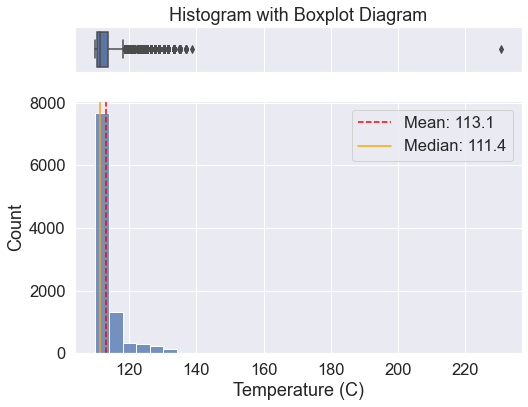

Min: 110.0 | Max: 230.7
5 Top highest car engine temperature recorded: [136.8, 136.8, 136.8, 138.7, 230.7]


In [12]:
utils.histogram_boxplot(df, x="Temperature (C)", bins=30, title="Histogram with Boxplot Diagram", xlabel="Temperature (C)")
print(f"5 Top highest car engine temperature recorded: {list(df['Temperature (C)'].sort_values().tail())}")

Based on the graph generated above, it is true that there is indeed an extreme outlier in the dataset. Therefore, we will drop/remove this car from the dataset.

In [13]:
outlier_index = df['Temperature (C)'].sort_values().tail(1).index
df = df.drop(outlier_index)

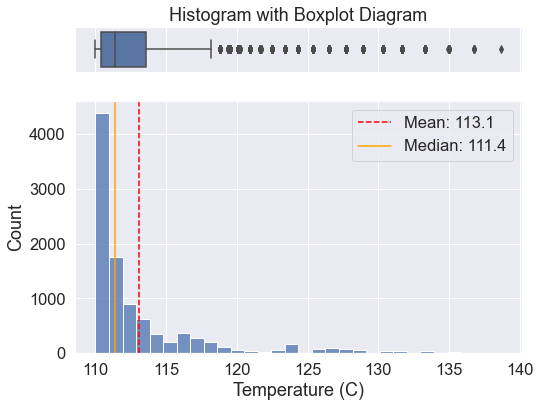

Min: 110.0 | Max: 138.7


In [14]:
utils.histogram_boxplot(df, x="Temperature (C)", bins=30, title="Histogram with Boxplot Diagram", xlabel="Temperature (C)")

### 5.3 `RPM`
**Description:** Average 30 days maximum torque speed at maximum torque before failure detected <br></br>
Given that negative values were observed in the `RPM` column, we will investigate those RPMs with either negative values or 0. <br></br>


In [15]:
# Check those RPM with negative values or 0
neg_rpms = len(df[df[f"RPM"] <= 0])

print(f"Number of RPMs with either negative or 0 values: {neg_rpms}")
df[df[f"RPM"] <= 0]["RPM"].value_counts().head(10)

# Convert all negative values to positive
df[f"RPM"] = df[f"RPM"].abs()

# Checking if there are any leftover zero values
print(f"Number of RPMs with zero values: {len(df[df['RPM'] == 0])}")

Number of RPMs with either negative or 0 values: 220
Number of RPMs with zero values: 0


There are quite a number of negative RPM values (i.e. 220) found in the dataset while there are no 0 RPM values observed. Based on this, it seems to me that most likely these negative RPM values are data entry errors, hence, we will remove the negative sign by taking the absolute of these negative values. 

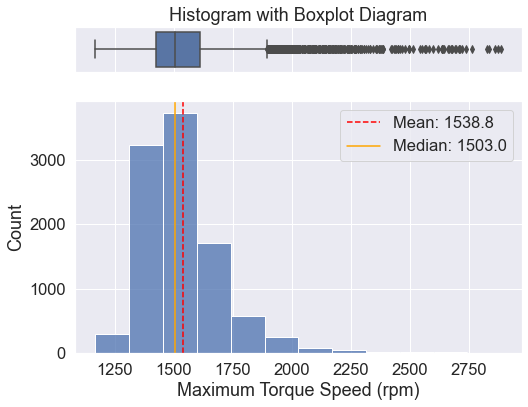

Min: 1168.0 | Max: 2886.0


In [16]:
utils.histogram_boxplot(df, x="RPM", bins=12, title="Histogram with Boxplot Diagram", xlabel="Maximum Torque Speed (rpm)")

### 5.4 `Factory`

It was mentioned earlier that there were several data entry errors such as 'Seng Kang, China', 'Newton, China' and 'Bedok, Germany' found in the dataset as this is because there are no such cities found in those countries. Therefore, these invalid city entries will be replaced with the correct city names. 

<br>

**Approach:**
1. Spltting the `Factory` column into two columns (`City` and `Country`) using ", " delimiter
2. Replace the invalid city names with the correct city names based on the given country


In [17]:
# Checking the counts of unique values
df["Factory"].value_counts()

Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2126
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64

In [18]:
# Spltting the `Factory` column into two columns using ", " delimiter
df[['City', 'Country']] = df["Factory"].str.split(", ", expand = True)
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Model No.,Car Year,Car Age,Temperature (C),City,Country
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0,Model 5,2022,1,110.3,Shang Hai,China
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0,Model 3,2022,1,110.4,Shang Hai,China
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0,Model 3,2022,1,110.3,Shang Hai,China
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0,Model 3,2022,1,110.4,Berlin,Germany
5,3b5e4310-9f3f-4c4d-92c3-ec09fa36f772,"Model 5, 2021",White,110.3 °C,1425,"Shang Hai, China",Medium,691.8,Premium,0,0,0,0,0,Model 5,2021,2,110.3,Shang Hai,China


In [19]:
# Replacing the invalid city names ("Seng Kang" and "Newton") with the correct city name ("Shang Hai")
df = df.replace(["Seng Kang", "Newton"], "Shang Hai")

# Replacing the invalid city names ("Bedok") with the correct city name ("Berlin")
df = df.replace(["Bedok"], 'Berlin')

print(f"Number of counts for each unique city:")
df["City"].value_counts()

Number of counts for each unique city:


Shang Hai    5628
Berlin       2245
New York     2126
Name: City, dtype: int64

In [20]:
print(f"Number of counts for each unique country:")
df["Country"].value_counts(normalize=True)

Number of counts for each unique country:


China      0.562856
Germany    0.224522
U.S        0.212621
Name: Country, dtype: float64

### 5.5 `Membership`

Based on our quick observations earlier, it was mentioned that there are only 3 unique values which are "None", "Normal" and "Premium". Therefore, for those missing values found (i.e. None), we will replace them with the string value "None".

In [21]:
df["Membership"] = df["Membership"].fillna("None")

# Checking if there are any other missing values found
print('Number of missing values in each column:')
df.isnull().sum()

Number of missing values in each column:


Car ID              0
Model               0
Color               0
Temperature         0
RPM                 0
Factory             0
Usage               0
Fuel consumption    0
Membership          0
Failure A           0
Failure B           0
Failure C           0
Failure D           0
Failure E           0
Model No.           0
Car Year            0
Car Age             0
Temperature (C)     0
City                0
Country             0
dtype: int64

In [22]:
# set categorical order
df['Membership'] = pd.Categorical(df['Membership'], categories=["None", "Normal", "Premium"], ordered=True)

print(f"Number of counts for each unique membership value:")
df["Membership"].value_counts()

Number of counts for each unique membership value:


Normal     4482
Premium    3416
None       2101
Name: Membership, dtype: int64

### 5.6 `Fuel Consumption`

Based on the initial observations, the values provided are ranging from **598.5 - 904.8 L/km** with a **mean of 679.5 L/km**. Assuming the litres are gasoline equivalent, the average fuel consumption range in Singapore is **approximately 5 - 6.7 L/100km** which equates to **500 - 670 L/km**. ([Reference](https://www.asiaone.com/lifestyle/singapore-pre-owned-car-guide-most-affordable-fuel-savers)) Therefore, the data provided seems to be in the correct measurement unit of L/km (as stated in the PDF). <br></br>

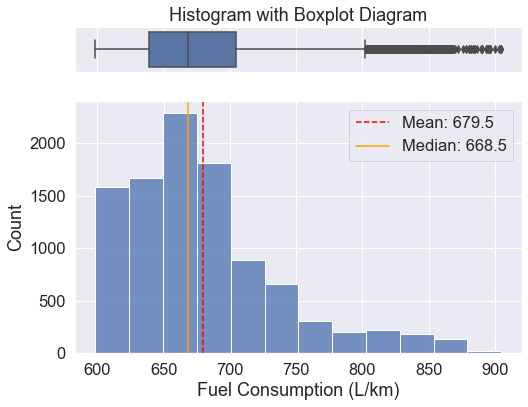

Min: 598.5 | Max: 904.8


In [23]:
utils.histogram_boxplot(df, x="Fuel consumption", bins=12, title="Histogram with Boxplot Diagram", xlabel="Fuel Consumption (L/km)")

At first glance, a **skewed right distribution** is observed with a median of 668.5 L/km. 

### 5.7 `Color`

Based on the pie chart shown below, we can observe that majority of the cars are white in colour while each of the remaining colors are approxiately between 10 - 11% of the dataset. 

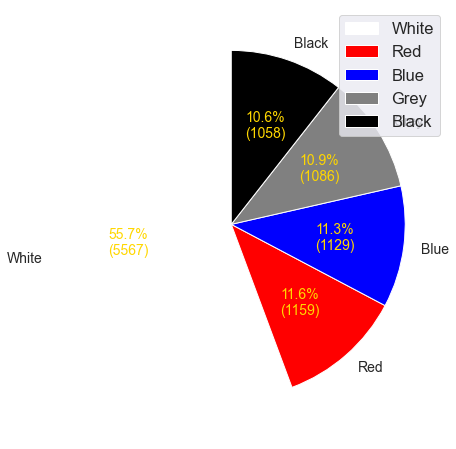

In [24]:
values = df["Color"].value_counts()
color_ranking = list(values.index)

utils.pie_plot(values, colors=color_ranking, text_color="gold")

### 5.8 `Usage`

Based on the pie chart shown below, we can observe that cars with high owner usage frequency has the largest proportion among all of the different usage frequency types. However, the differences between the 3 usage frequency types are not too far apart and generally speaking, they all have approximately similar proportions. 

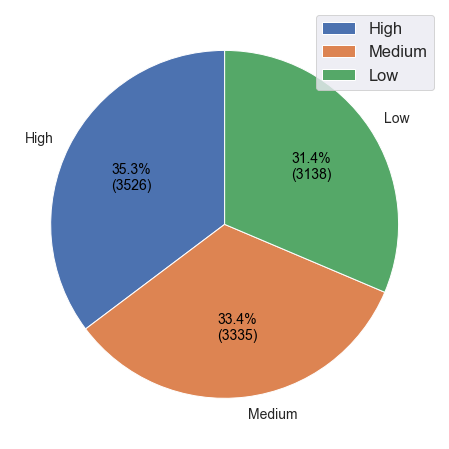

In [25]:
values = df["Usage"].value_counts()
utils.pie_plot(values)

In [26]:
# set categorical order
df['Usage'] = pd.Categorical(df['Usage'], categories=["Low", "Medium", "High"], ordered=True)

### 5.9 `Failure A`, `Failure B`, `Failure C`, `Failure D` & `Failure E`

Given that there isn't any target variable provided in the dataset, I wanted to find out whether the sum of values across these columns will be greater than 1. 

1. If it is not, this means that as long as one of the car failure types is identified, we will classify the car as a car fault identified (i.e. 1). And this also means for cars with none of the car failure types being identified, the car will be classified as car fault NOT identified (i.e. 0).
2. If it is, further investigation will be required to set a threshold in order to indicate whether a car failure has occurred.

In [27]:
f_types = ["A", "B", "C", "D", "E"]
f_tables = []

for f in f_types:
    table = df[f"Failure {f}"].value_counts(normalize=True).rename_axis(f"Failure").reset_index(name="Counts")
    table = table.assign(Type=[str(f) for i in range(len(df[f"Failure {f}"].value_counts()))])
    f_tables.append(table)

f_summary = pd.concat(f_tables, axis=0).reset_index(drop=True)
f_summary

,Failure,Counts,Type
0,0,0.974097,A
1,1,0.025903,A
2,0,0.981598,B
3,1,0.018402,B
4,0,0.968997,C
5,1,0.031003,C
6,0,0.975598,D
7,1,0.024402,D
8,0,0.973597,E
9,1,0.026403,E


Among all of the different Failure Types, Failure C has the highest % (i.e. 3.1%) while Failure B has the lowest (i.e. 1.8%). The remaining Failure Types have roughly similar % ranging from 2.4% - 2.6%.


In [28]:
failures = df[["Failure A", "Failure B", "Failure C", "Failure D", "Failure E"]].copy()

# Sum of values across the car failure type columns
df["Target"] = failures.sum(axis=1)
# df["Target"] = df["Target"].astype(str)
print(f"Unique values under `Target` column: {df['Target'].unique()}")

Unique values under `Target` column: [0 1]


Based on the above findings, we can conclude that as long as the `Target` column equates to 1, this represents a corresponding car fault has been identified while the `Target` column equating to 0 represents no corresponding car fault has been identified.

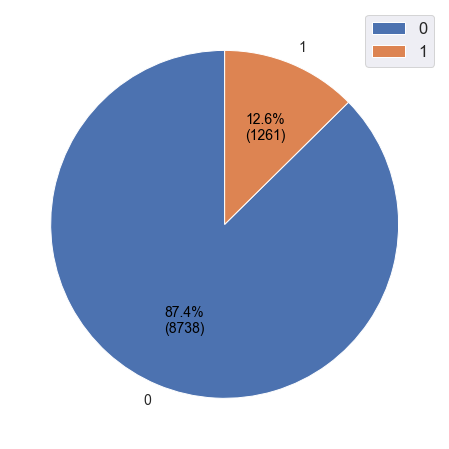

In [29]:
values = df["Target"].value_counts()
utils.pie_plot(values)

From the pie chart generated above, there is an imbalanced Target distribution given that the number of counts in the dataset for each class label (either 0 or 1) is not well balanced. This means the Target distribution is skewed towards the "0" class label as 87.4% of the data are labelled "0" (i.e. no car fault identified) while only 12.6% of the data are labelled "1" (i.e. car fault identified). 


Based on the above findings for a binary classification problem, several techniques will be considered to improve the training of a classifier to detect the abnormal class which in this case is identifying a car failure: [Reference](https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html)

1. Use the right evaluation metrics instead of using accuracy as the evaluation metrics to measure the goodness of a model
    - This is because the trained model will classify most of the testing samples to "0" and this will have an excellent accuracy score which is misleading and the model would not be providing any valuable information.
    - Precision/Specificity: how many selected instances are relevant
    - Recall/Sensitivity: how many relevant instances are selected
    - F1 score: harmonic mean of precision and recall
    - MCC: correlation coefficient between the observed and predicted binary classifications
    - AUC: relation between true-positive rate and false positive rate
<br/><br/>

2. Resampling the training set
    - Under-sampling
    - Over-sampling
<br/><br/>

3. Use K-fold Cross-Validation in the right approach
    - This is especially critical if over-sampling method is used to address the imbalanced classification problem.
    - If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result. Therefore cross-validation should always be done before over-sampling the data, just as how feature selection should be implemented. This allows us to avoid an overfitting problem by resampling the data repeatedly in order to introduce randomness into the dataset.
<br/><br/>

4. Ensemble different resampled datasets (***)
    - One easy best practice is building n models that use all the samples of the rare class and n-differing samples of the abundant class.
    - Given that you want to ensemble 10 models, you would keep e.g. the 1.000 cases of the rare class and randomly sample 10.000 cases of the abundant class. Then you just split the 10.000 cases in 10 chunks and train 10 different models.
<br/><br/>

5. Resample with Different Ratios
    - For the previous approach (i.e. training all models with the same ratio in the ensemble), we can be fine-tuned by playing with the ratio between the rare and the abundant class. The best ratio  heavily depends on the data and the models that are used. 
    - So if 10 models are trained, it might make sense to have a model that has a ratio of 1:1 (rare:abundant) and another one with 1:3, or even 2:1. Depending on the model used this can influence the weight that one class gets.
<br/><br/>

6. Cluster the abundant class
    - Instead of relying on random samples to cover the variety of the training samples, clustering the abundant class in r groups, with r being the number of cases in r.
    - For each group, only the medoid (centre of cluster) is kept. The model is then trained with the rare class and the medoids only.
<br/><br/>

7. Design Your Models
    - All the previous methods focus on the data and keep the models as a fixed component. But in fact, there is no need to resample the data if the model is suited for imbalanced data. The famous XGBoost is already a good starting point if the classes are not skewed too much, because it internally takes care that the bags it trains on are not imbalanced. But then again, the data is resampled, it is just happening secretly.
    - By designing a cost function that is penalizing wrong classification of the rare class more than wrong classifications of the abundant class, it is possible to design many models that naturally generalize in favour of the rare class.
    - For example, tweaking an SVM to penalize wrong classifications of the rare class by the same ratio that this class is underrepresented.

# 6. EDA
## 6.1 Univariate Analysis

**Approach:** 
- Look into the `Target` variable first
- Categorical Features: `Usage`, `Membership`, `Model No.`, `Car Year`, `City`/`Country`, `Color`
- Numerical Features: `Car Age`, `Temperature (C)`, `RPM`, `Fuel consumption`

In [30]:
cleaned_df = df.copy()

print(f"Number of columns: {len(cleaned_df.columns)}")
print(f"List of columns: {list(cleaned_df.columns)}")

Number of columns: 21
List of columns: ['Car ID', 'Model', 'Color', 'Temperature', 'RPM', 'Factory', 'Usage', 'Fuel consumption', 'Membership', 'Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E', 'Model No.', 'Car Year', 'Car Age', 'Temperature (C)', 'City', 'Country', 'Target']


### `Target` Variable

We will split the data into 2 categories (i.e. no_fault and fault) in order to investigate the fault cars and non-fault cars separately.

In [31]:
# Create a fault and no_fault datasets to store values for the cars with failure detected and cars with no failure detected respectively.  
fault, no_fault = utils.split_category(cleaned_df)

In [32]:
# Descriptive Statistics for the cars with failure detected
fault.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Car Year,Car Age,Temperature (C),Target
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,1532.674068,692.631562,0.205393,0.145916,0.245837,0.193497,0.209358,2016.174465,6.825535,113.540841,1.0
std,245.996669,64.368876,0.404148,0.353162,0.430753,0.395196,0.407012,3.393226,3.393226,4.653308,0.0
min,1181.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,110.100000,1.0
25%,1380.000000,646.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,4.000000,110.400000,1.0
50%,1477.000000,685.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,7.000000,111.600000,1.0
75%,1602.000000,719.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,10.000000,115.100000,1.0
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,14.000000,136.800000,1.0


In [33]:
# Descriptive Statistics for the cars with no failure detected
no_fault.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E,Car Year,Car Age,Temperature (C),Target
count,8738.000000,8738.000000,8738.0,8738.0,8738.0,8738.0,8738.0,8738.000000,8738.000000,8738.000000,8738.0
mean,1539.671664,677.557862,0.0,0.0,0.0,0.0,0.0,2016.668002,6.331998,113.044186,0.0
std,167.482613,57.291117,0.0,0.0,0.0,0.0,0.0,3.169686,3.169686,4.497862,0.0
min,1168.000000,598.500000,0.0,0.0,0.0,0.0,0.0,2010.000000,1.000000,110.000000,0.0
25%,1428.250000,637.800000,0.0,0.0,0.0,0.0,0.0,2014.000000,4.000000,110.400000,0.0
50%,1506.000000,666.750000,0.0,0.0,0.0,0.0,0.0,2017.000000,6.000000,111.300000,0.0
75%,1614.000000,698.400000,0.0,0.0,0.0,0.0,0.0,2019.000000,9.000000,113.600000,0.0
max,2695.000000,868.600000,0.0,0.0,0.0,0.0,0.0,2022.000000,13.000000,138.700000,0.0


<u>**Observations:**</u>

Comparing the descriptive statistics of the 2 categories for each numeric column:
1. `RPM`: 
    - For cars with no failure detected, its mean, median, lower-quantile, and upper-quantile RPM values (i.e. 1539.7, 1506.0, 1428.3 and 1614 respecitvely) are higher than that for cars with failure detected (i.e. 1532.6, 1477.0, 1380.0 and 1602). 
    - Apart from that, only the minimum and maximum RPM values for cars with no failure detected are lower than that for cars with failure detected. 
    - Generally speaking, this makes sense given that normally cars with no failure detected should have a higher RPM value compared to cars with failure detected. 
2. `Fuel Consumption`:  
    - For cars with no failure detected, most of its descriptive statistic values are lower than that for cars with failure detected. This makes sense given that it is normal for cars with no failure detected to consume lesser fuel to travel the same distance as compared to cars with failure detected. 
3. `Car Age`:
    - For cars with no failure detected, its mean and median car age values are lower than that for cars with failure detected. This also is very logical given that older cars will normally have a higher tendency of breaking down compared to younger/newer cars. 
4. `Temperature (C)`:
    - For cars with no failure detected, most of its descriptive statistic values are lower than that for cars with failure detected. Likewise, this is expected as the engine of older cars tend to overheat due to several reasons such as cooling system leaks, broken water pump or thermostat failure, etc. ([Reference](https://www.goodyearautoservice.com/en-US/learn/engine-overheating))
<br/><br/>

Model Insights:
1. For car with no failure detected, their mean RPM value is approximately 0.5% greater than that for car with failure detected. (Non-faulty car: 1539.7 | Faulty cars: 1532.6)
2. For car with no failure detected, their mean fuel consumption is approximately 2.2% lower than that for car with failure detected. (Non-faulty car: 677.5 L/km | Faulty cars: 692.6 L/km)
3. For car with no failure detected, their mean car age is approximately 7.7% younger than that for car with failure detected. (Non-faulty car: 6.33 years old | Faulty cars: 6.82 years old)
4. For car with no failure detected, their mean car engine temperature is approximately 0.5% lower than that for car with failure detected. (Non-faulty car: 113.0 C | Faulty cars: 113.5 C)

### `Hypothesis`

Based on the following variables listed below, I hypothesize that these are the variables that could play an important role in helping to predict the occurence of car failure in order for the automotive company to formulae mitigative policies. <br></br>

<u>**Variables:**</u>
1. `RPM`: Cars with higher RPMs are more likely not to have any car failures detected.
2. `Fuel Consumption`: Cars that require lower fuel consumption to travel the same distance are more likely not to have any car failures detected.
3. `Car Age`: Older cars generally have a higher tendency of getting car failures detected due to common wear and tear. 
4. `Temperature (C)`: Cars with a higher car engine temperature before failure detected are more likely to have car failures detected.
5. `Usage`: Cars with higher usage frequency are often more likely to have car failures detected.
6. `Membership`: Cars with premium membership tier will more likely not have any car failures detected compared to the normal membership tier.
<br></br>

Therefore, we will investigate in detail of these variables with respect to the `Target` variable first. Afterwards, we will look into other variables such as `Model No.`, `Color`, `Country` / `City` and `Car Year`. 


### 6.1.1 `Target` vs `RPM`

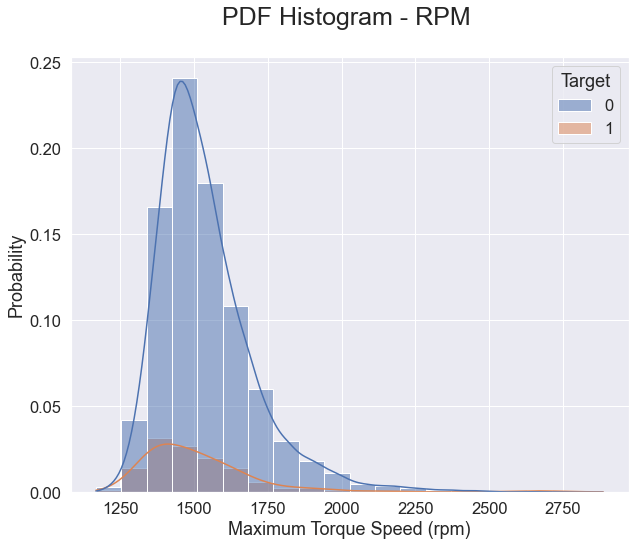

In [34]:
# Probability Density Function (PDF) histogram for `RPM` against `Target`
utils.histoPDF(cleaned_df, "RPM", "Target", "Maximum Torque Speed (rpm)", "Probability", bins=20)

In [35]:
utils.pdf_cdf(no_fault, "RPM", bins=20)

,Bin Ranges,PDFs,CDFs
0,1168.0 - 1244.4,0.002747,0.002747
1,1244.4 - 1320.7,0.029068,0.031815
2,1320.7 - 1397.0,0.130808,0.162623
3,1397.0 - 1473.4,0.236553,0.399176
4,1473.4 - 1549.8,0.217670,0.616846
5,1549.8 - 1626.1,0.154612,0.771458
6,1626.1 - 1702.4,0.095789,0.867247
7,1702.4 - 1778.8,0.052300,0.919547
8,1778.8 - 1855.2,0.029755,0.949302
9,1855.2 - 1931.5,0.019684,0.968986


In [36]:
utils.pdf_cdf(fault, "RPM", bins=20)

,Bin Ranges,PDFs,CDFs
0,1181.0 - 1266.2,0.016653,0.016653
1,1266.2 - 1351.5,0.132435,0.149088
2,1351.5 - 1436.8,0.249009,0.398097
3,1436.8 - 1522.0,0.210944,0.609040
4,1522.0 - 1607.2,0.148295,0.757335
5,1607.2 - 1692.5,0.106265,0.863600
6,1692.5 - 1777.8,0.044409,0.908010
7,1777.8 - 1863.0,0.020619,0.928628
8,1863.0 - 1948.2,0.019826,0.948454
9,1948.2 - 2033.5,0.012688,0.961142


<u>**Insights:**</u>

- Based on the generated graph above, both seem to follow a similar pattern (i.e. right-skewed histogram - which means the mean always comes to the right of the mode) although there is a slight shift towards the right for those cars with no failure detected (i.e. approximately 1473 rpm). Whereas for those cars with failure detected, it is slightly shifts to the left (i.e. approximately 1436 rpm).
- Approximately 23.6% of the cars with no failures detected have a RPM range of 1397.0 - 1473.4
- Approximately 25% of the cars with failures detected have a RPM range of 1351.5 - 1436.8

### 6.1.2 `Target` vs `Fuel Consumption`

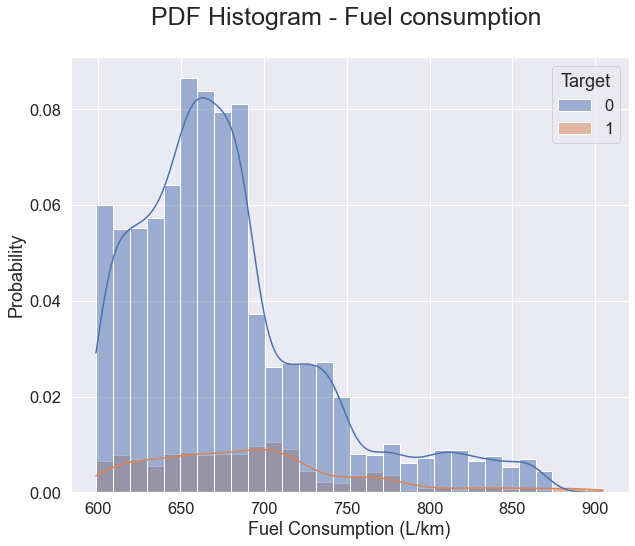

In [37]:
# Probability Density Function (PDF) histogram for `Fuel Consumption` against `Target`
utils.histoPDF(cleaned_df, "Fuel consumption", "Target", "Fuel Consumption (L/km)", "Probability", bins=30)

In [38]:
utils.pdf_cdf(no_fault, "Fuel consumption", bins=30).head(15)

,Bin Ranges,PDFs,CDFs
0,598.5 - 607.5,0.061913,0.061913
1,607.5 - 616.5,0.053559,0.115473
2,616.5 - 625.5,0.054704,0.170176
3,625.5 - 634.5,0.058251,0.228428
4,634.5 - 643.5,0.059052,0.287480
5,643.5 - 652.5,0.075189,0.362669
6,652.5 - 661.5,0.087892,0.450561
7,661.5 - 670.5,0.084001,0.534562
8,670.5 - 679.5,0.078965,0.613527
9,679.5 - 688.5,0.081483,0.695010


In [39]:
utils.pdf_cdf(fault, "Fuel consumption", bins=30).head(15)

,Bin Ranges,PDFs,CDFs
0,598.5 - 608.7,0.051546,0.051546
1,608.7 - 618.9,0.061063,0.112609
2,618.9 - 629.1,0.054718,0.167328
3,629.1 - 639.3,0.042823,0.210151
4,639.3 - 649.6,0.062649,0.272799
5,649.6 - 659.8,0.067407,0.340206
6,659.8 - 670.0,0.061063,0.401269
7,670.0 - 680.2,0.063442,0.464711
8,680.2 - 690.4,0.064235,0.528945
9,690.4 - 700.6,0.076923,0.605868


<u>**Insights:**</u>

- Based on the graph above, there is a distinct shift to the left for cars with no failures detected. (i.e. right-skewed histogram) Whereas for cars with failures detected, it is only slightly a right-skewed histogram given that curve is relatively a lot flatter than the curve for cars with no failures detected. 
- Approximately 8.7% of the cars with no failures detected have a fuel consumption range of 652.5 - 661.5 L/km.
- Approximately 8.4% of the cars with failures detected have a fuel consumption range of 700.6 - 710.8 L/km.



### 6.1.3 `Target` vs `Car Age`

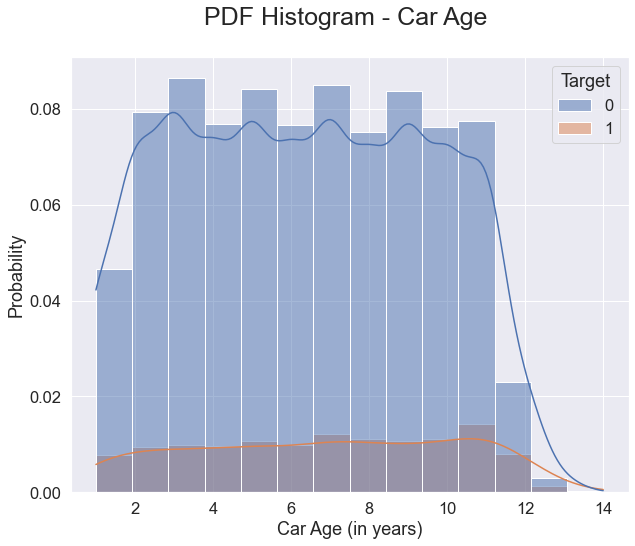

In [40]:
# Probability Density Function (PDF) histogram for `Car Age` against `Target`
utils.histoPDF(cleaned_df, "Car Age", "Target", "Car Age (in years)", "Probability", bins=14)

In [41]:
utils.pdf_cdf(no_fault, "Car Age", bins=14)

,Bin Ranges,PDFs,CDFs
0,1.0 - 1.9,0.053330,0.053330
1,1.9 - 2.7,0.090867,0.144198
2,2.7 - 3.6,0.098878,0.243076
3,3.6 - 4.4,0.088006,0.331083
4,4.4 - 5.3,0.096361,0.427443
5,5.3 - 6.1,0.087663,0.515106
6,6.1 - 7.0,0.000000,0.515106
7,7.0 - 7.9,0.097276,0.612383
8,7.9 - 8.7,0.086061,0.698444
9,8.7 - 9.6,0.095903,0.794347


In [42]:
utils.pdf_cdf(fault, "Car Age", bins=14)

,Bin Ranges,PDFs,CDFs
0,1.0 - 1.9,0.061856,0.061856
1,1.9 - 2.9,0.075337,0.137193
2,2.9 - 3.8,0.077716,0.214909
3,3.8 - 4.7,0.076923,0.291832
4,4.7 - 5.6,0.085646,0.377478
5,5.6 - 6.6,0.077716,0.455194
6,6.6 - 7.5,0.095956,0.551150
7,7.5 - 8.4,0.088025,0.639175
8,8.4 - 9.4,0.084060,0.723236
9,9.4 - 10.3,0.088818,0.812054


<u>**Insights:**</u>

- Based on the graph above, it seems like both roughly have a multimodel distribution (i.e. plateau distribution) which provides little information about the differences between those cars with and without failures detected. 
- However, there is a slight spike for cars with failures detected that have a car age range of 10.3 - 11.2 years old and that is approximately 11.3% of cars with failures detected. 
- For a car age range of 6.1 - 7.0 years old, there is 0% of cars with no failures detected. 

### 6.1.4 `Target` vs `Temperature (C)`

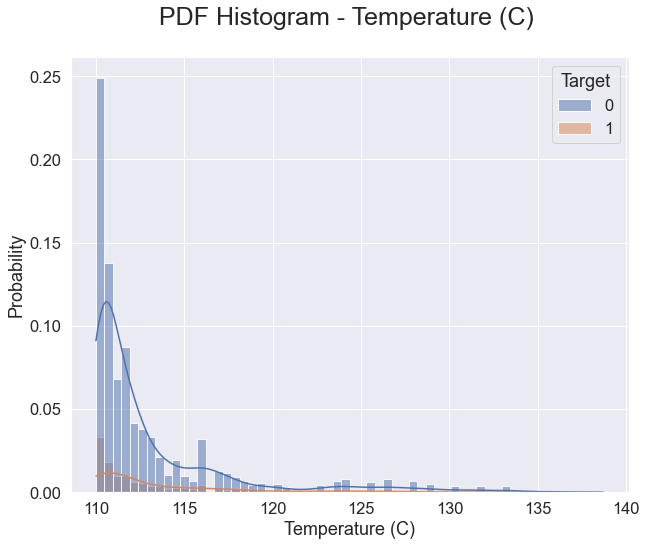

In [43]:
# Probability Density Function (PDF) histogram for `Temperature (C)` against `Target`
utils.histoPDF(cleaned_df, "Temperature (C)", "Target", "Temperature (C)", "Probability", bins=60)

In [44]:
utils.pdf_cdf(no_fault, "Temperature (C)", bins=60).head()

,Bin Ranges,PDFs,CDFs
0,110.0 - 110.5,0.284733,0.284733
1,110.5 - 111.0,0.157702,0.442435
2,111.0 - 111.4,0.077935,0.520371
3,111.4 - 111.9,0.100137,0.620508
4,111.9 - 112.4,0.047608,0.668116


In [45]:
utils.pdf_cdf(fault, "Temperature (C)", bins=60).head()

,Bin Ranges,PDFs,CDFs
0,110.1 - 110.5,0.289453,0.289453
1,110.5 - 111.0,0.116574,0.406027
2,111.0 - 111.4,0.075337,0.481364
3,111.4 - 111.9,0.062649,0.544013
4,111.9 - 112.3,0.063442,0.607454


<u>**Insights:**</u>

- Based on the graph generated above, it is clear to say that this distribution is positively skewed (i.e. right-skewed histogram). This makes sense given that majority of the dataset consists of cars with no failures detected and most of these car engine temperatures recorded (i.e. at least 75% of them - upper-quantile value: 113.60 C) are relatively lower than the mean car engine temperature for cars with failures detected (i.e. 113.63 C). 
- Approximately 28.5% of the cars with no failures detected have a car engine temperautre range of 110.0 - 110.5 C.
- Approximately 28.9% of the cars with failures detected have a car engine temperautre range of 110.1 - 110.5 C.

### `Box & Whisker's Plots`

Box and whisker plots are used for continuous variables to visualize the difference between cars with failures detected and those with no failures detected. 

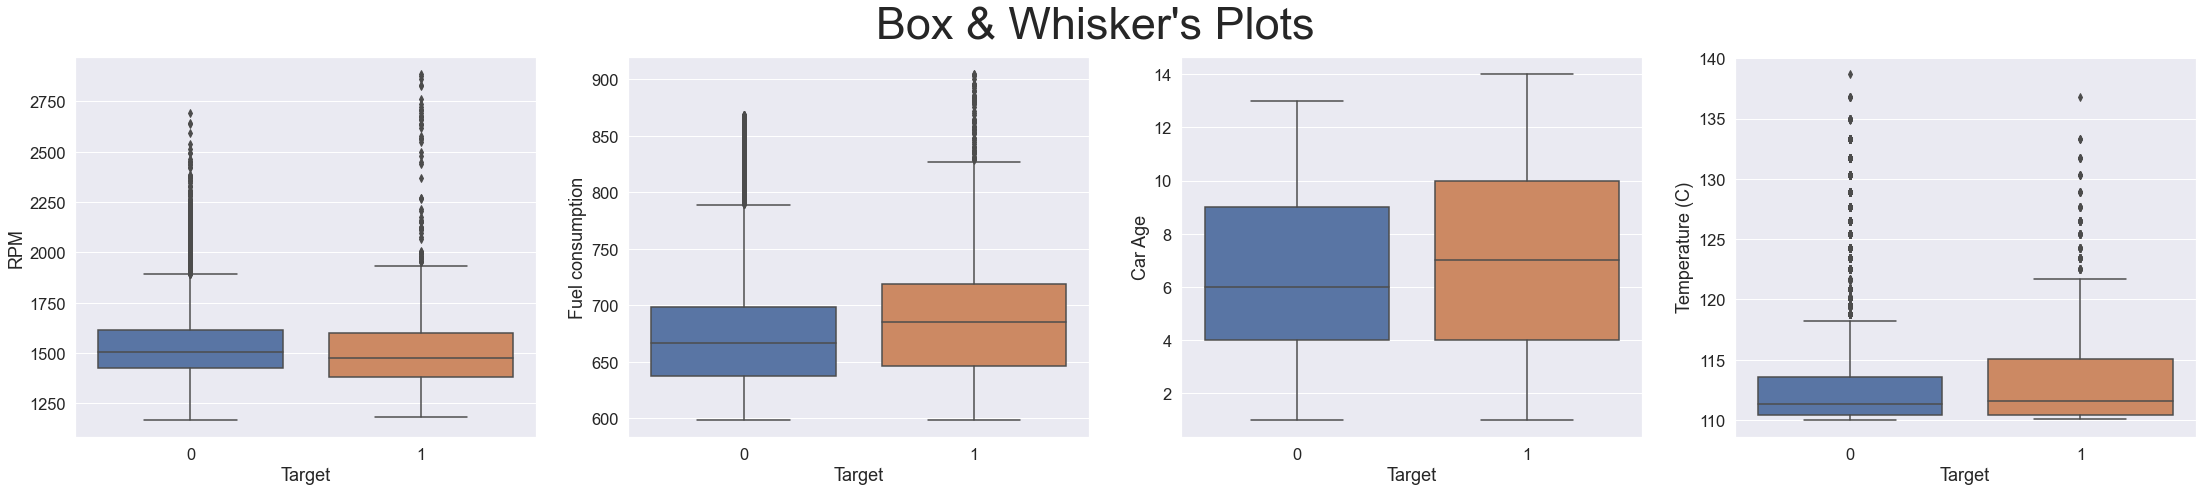

In [46]:
utils.box_whisker(cleaned_df, ["RPM", "Fuel consumption", "Car Age", "Temperature (C)"])

Based on the graphs generated above, it is a lot easier to look out for outliers and consider on whether such outliers should be included or removed. Apart from the extreme outlier that was found earlier, the rest of the outliers observed in here will remain as they can capture valuable information even though they will also reduce statistical significance. 

### `Violin Plots`

Violin plots are also used for continuous variables to visualize the difference between cars with failures detected and those with no failures detected. 

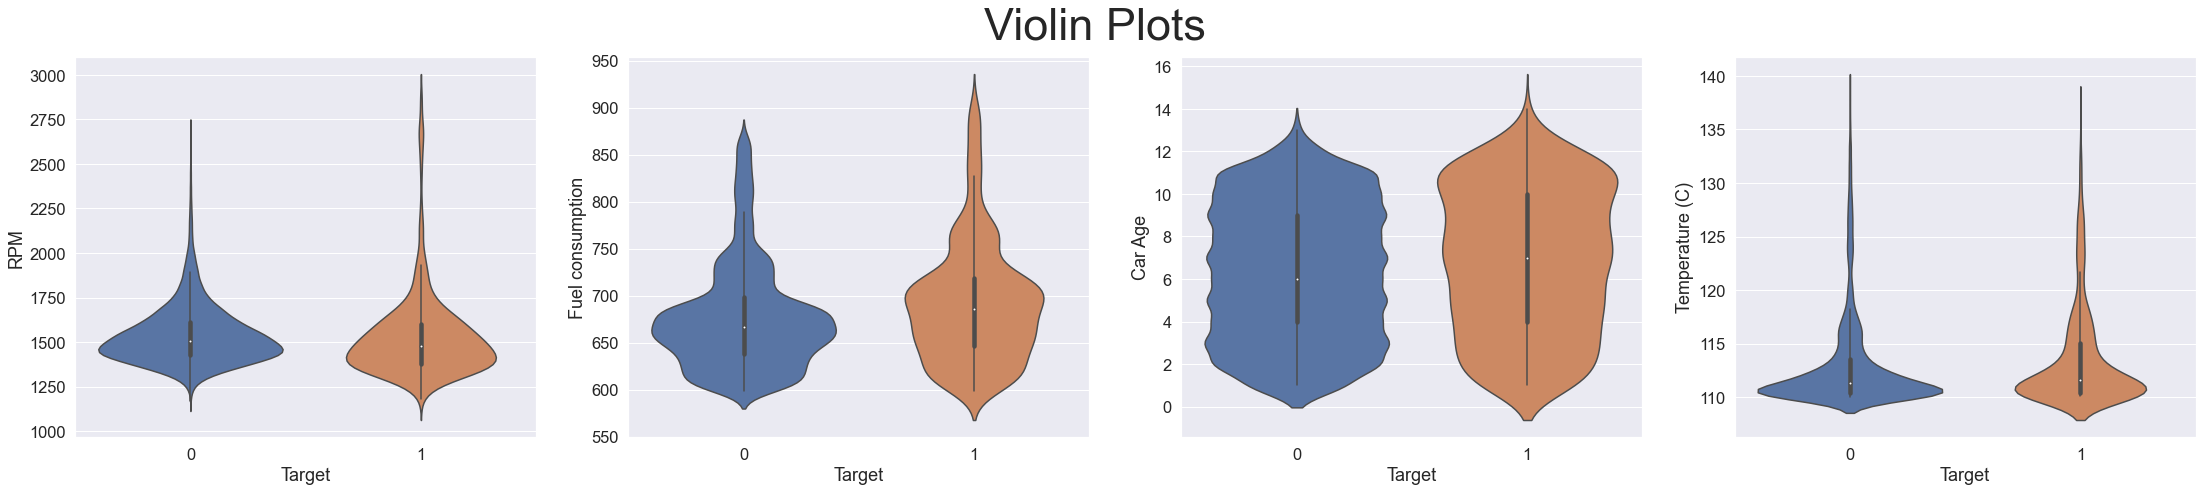

In [47]:
utils.violin_plot(cleaned_df, ["RPM", "Fuel consumption", "Car Age", "Temperature (C)"])

Looking at the graphs above, both plots for each variable illustrates similar patterns although the plots for cars with no failures detected often have sharper peaks compared to the cars with failures detected. Overall, both violin and Box & Whisker plots portray similar results to what was mentioned earlier. 

### 6.1.5 `Target` vs `Usage`

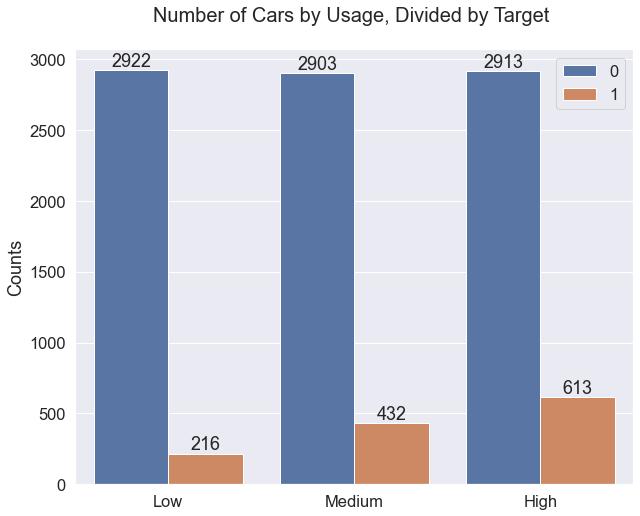

,Usage,Probability
1,High,0.173851
2,Medium,0.129535
0,Low,0.068834


In [48]:
# Bar plot for `Usage` against `Target`
utils.barplot(fault, no_fault, "Usage")

<u>**Insights:**</u>

- Among the cars with no failures detected, all three usage categories have roughly the same frequency whereas for those cars with failures detected, there is a rising trend observed where greater owner usage frequency of the car will lead to higher number of cars with failures detected. 
- This is very logical given that more frequently used cars will have a higher tendency to have some car failures occurring due to wear and tear. 

### 6.1.6 `Target` vs `Membership`

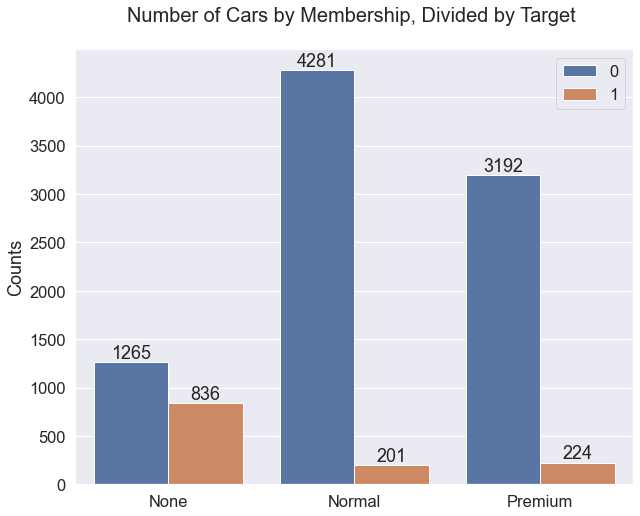

,Membership,Probability
2,None,0.397906
1,Premium,0.065574
0,Normal,0.044846


In [49]:
# Bar plot for `Membership` against `Target`
utils.barplot(fault, no_fault, "Membership")

<u>**Insights:**</u>

- Based on the graph generated above, we can observed that if the car owner is not a member with the automotive company, the probability of detecting car failures will be a lot higher relative to those car owners who hve memberships with the automotive company. Here are the list of probabilities of detecting car failures for each membership tier:
    1. `None` Membership Tier: approximately 40% 
    2. `Normal` Membership Tier: approximately 4.5%
    3. `Premium` Membership Tier: approximately 6.6% 
- For car owners under the `Premium` membership tier, the probability of detecting car failures is greater than that for car owners under the `Normal` membership tier. At first glance, this might be a little surprising however, a plausible reason for this could be due to the unlimited car servicing provided for the `Premium` membership tier car owners which increases the chances for the automotive company to detect car failures. Whereas for the `Normal` membership tier car owners, they are only given 2 complimentary car servicings per year. 

### 6.1.7 `Target` vs `Model No.`

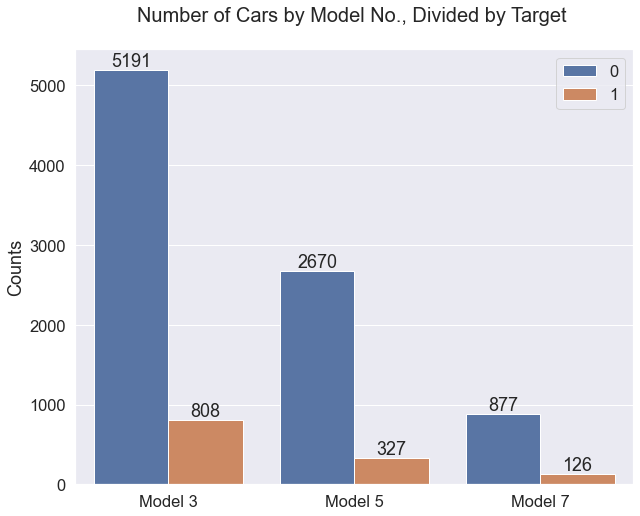

,Model No.,Probability
0,Model 3,0.134689
2,Model 7,0.125623
1,Model 5,0.109109


In [50]:
# Bar plot for `Model No.` against `Target`
utils.barplot(fault, no_fault, "Model No.")

<u>**Insights:**</u>

- Based on the graph generated above, we observed that there is a decreasing trend for both `Target` categories. 
- However, if we are looking the probabilities of detecting car failures for each car model, we can see that `Model 5` has actually the lowest probability even though it has lesser specifications compared to `Model 7`. (Kindly note, we are assuming increasing of specifications to the car equates to a high quality car.) Here are the list of probabilities of detecting car failures for each car model:
    1. `Model 3` Membership Tier: approximately 13.5% 
    2. `Model 5` Membership Tier: approximately 10.9%
    3. `Model 7` Membership Tier: approximately 12.6%
- Later on, We might need to investigate further to find out whether if this is due to the manufacturing origin of the car (i.e. `Country`/`City`). 

### 6.1.8 `Target` vs `Color`

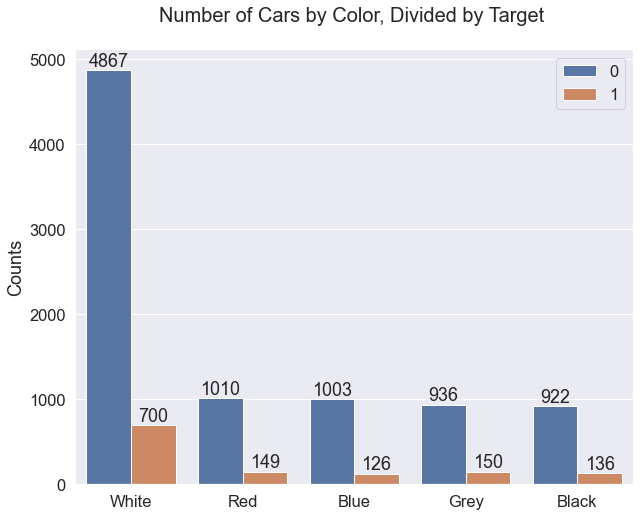

,Color,Probability
3,Grey,0.138122
1,Red,0.128559
4,Black,0.128544
0,White,0.125741
2,Blue,0.111603


In [51]:
# Bar plot for `Color` against `Target`
utils.barplot(fault, no_fault, "Color")

<u>**Insights:**</u>

- Based on the graph above, we can see that white cars are the majority in the dataset given while other car colours have generally similar numbers. 
- Among all the car colors, the grey cars seemed to have the highest probability of detecting car failures. Here are the list of probabilities of detecting car failures for each car color:
    1. `White`: approximately 12.6% 
    2. `Red`: approximately 12.9%
    3. `Blue`: approximately 11.2%
    4. `Grey`: approximately 13.8%
    5. `Black`: approximately 12.9%

### 6.1.9 `Target` vs `Country`/`City`

For this component, using either `Country` or `City` alone will suffice to analyse given that there are 3 unique countries with only 1 unique city label. Here is the list for reference:
- China - Shang Hai
- Germany - Berlin
- U.S - New York

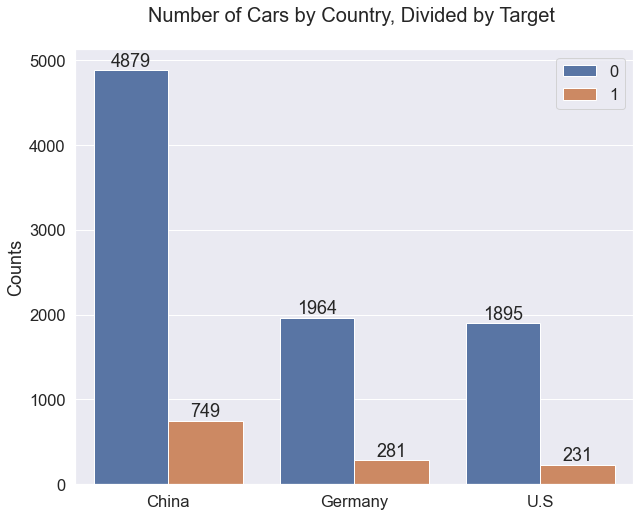

,Country,Probability
0,China,0.133085
1,Germany,0.125167
2,U.S,0.108655


In [52]:
# Bar plot for `Country` against `Target`
utils.barplot(fault, no_fault, "Country")

<u>**Insights:**</u>

- Based on the graph shown above, we can see that majority of the cars are manufactured from China while cars manufactured from both U.S and Germany are roughly similar to one another. 
- Among the 3 countries, cars manufactured from China has the highest probability of detecting car failures while the U.S has the lowest. Here are the list of probabilities of detecting car failures for each car color:
    1. `China`: approximately 13.3% 
    2. `Germany`: approximately 12.5%
    3. `U.S`: approximately 10.9%

### 6.1.10 `Target` vs `Car Year`

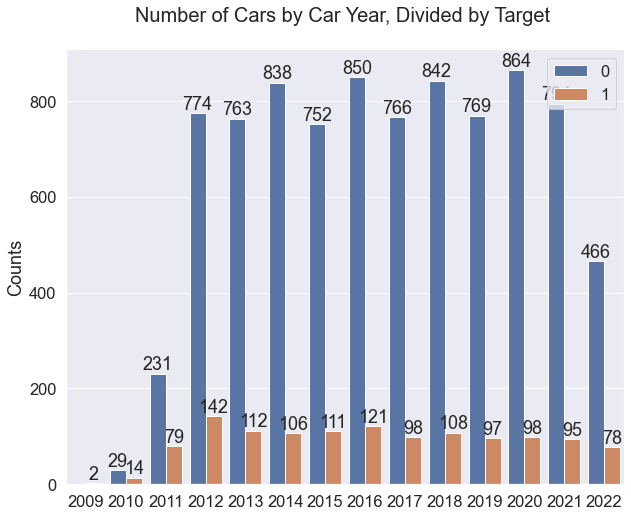

,Car Year,Probability
13,2009,1.000000
12,2010,0.325581
11,2011,0.254839
5,2012,0.155022
10,2022,0.143382
9,2015,0.128621
8,2013,0.128000
1,2016,0.124614
2,2018,0.113684
7,2017,0.113426


In [53]:
# Bar plot for `Car Year` against `Target`
utils.barplot(fault, no_fault, "Car Year")

<u>**Insights:**</u>

- Based on the graph above, we can see that apart from cars with car years 2022, 2011 and below, the remaining of the car years generally have similar number of cars (with or without failures detected). 
- From the list of probabilities of detecting car failures for each car year (excluding car year 2009), the car year 2010 has the highest probability which makes sense.
- However, it is surprising to see the year 2022 cars in the top 5 highest probability of detecting car failures, given that these cars are only manufactured recently. My suspicion is that the root cause could be due to the manufacturing origin of the car or the car model no. or both. Further investigations will be conducted under the bivariate analysis. 

## 6.2 Bivariate Analysis

**Approach:** 
- Based on the univariate anlaysis, some of the features have more signifance compared to others. Therefore, I will focus on more significant features first and investigate the relationship between them first via scatterplots and categorical plots. 
- **More significant** features: `RPM`, `Fuel consumption`, `Temperature (C)`, `Usage`, `Membership`, `Model No.`, `Country`
- **Less significant** features: `Car Age`, `Car Year`, `Color`

In [54]:
cleaned_df.columns

Index(['Car ID', 'Model', 'Color', 'Temperature', 'RPM', 'Factory', 'Usage',
       'Fuel consumption', 'Membership', 'Failure A', 'Failure B', 'Failure C',
       'Failure D', 'Failure E', 'Model No.', 'Car Year', 'Car Age',
       'Temperature (C)', 'City', 'Country', 'Target'],
      dtype='object')

### 6.2.1 `RPM` & `Fuel Consumption`

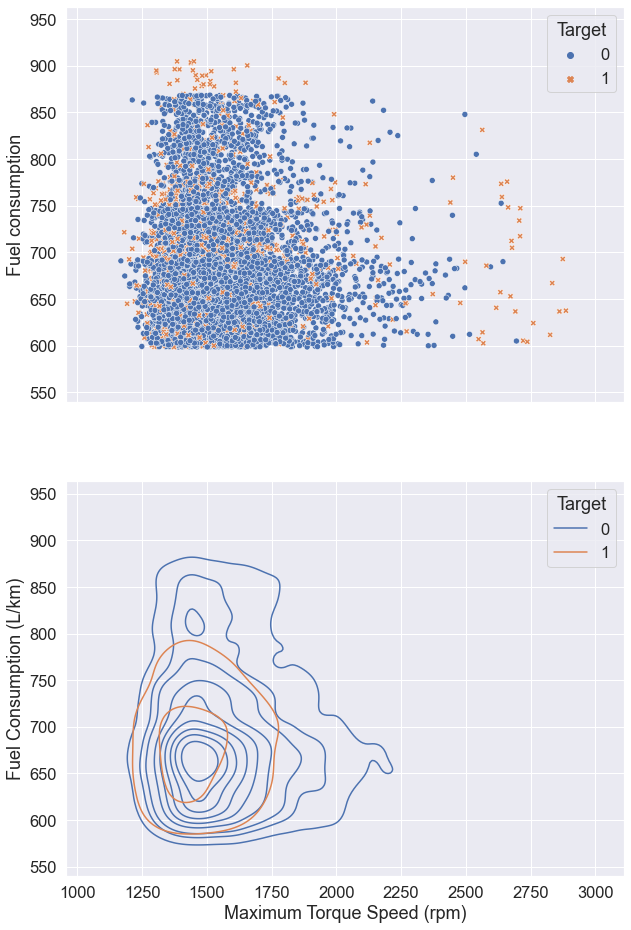

In [55]:
utils.scatter_kdeplot(cleaned_df, "RPM", "Fuel consumption", "Maximum Torque Speed (rpm)", "Fuel Consumption (L/km)")

Based on the graph generated above, we can see that as long as the car's maximum torque speed is greater than approximately 2700 rpm or the car's fuel consumption is greater than 875L/km, the occurence of a car failure detected will most likely happen. 

### 6.2.2 `RPM` & `Temperature (C)`

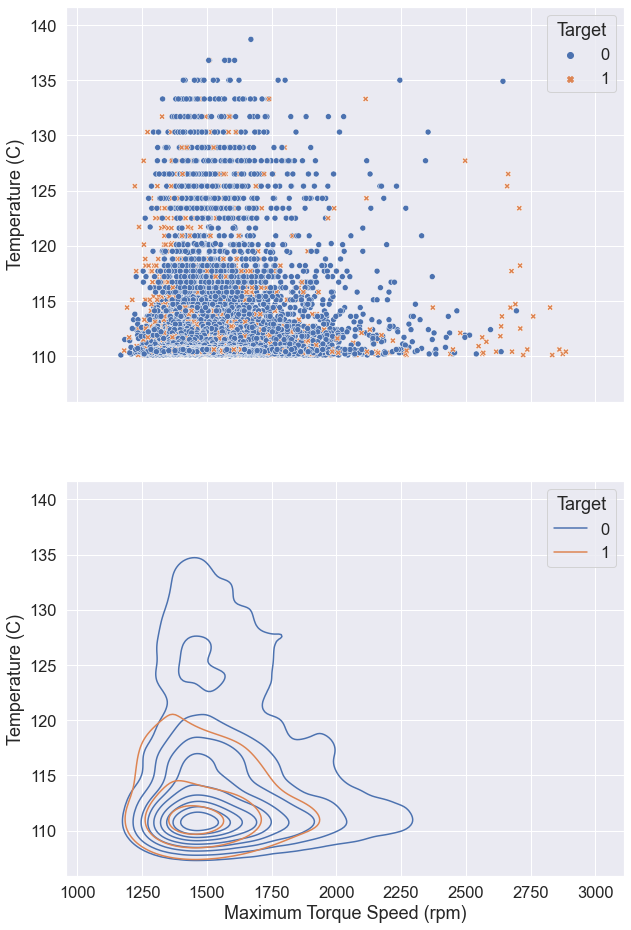

In [56]:
utils.scatter_kdeplot(cleaned_df, "RPM", "Temperature (C)", "Maximum Torque Speed (rpm)", "Temperature (C)")

Based on the graph above, we can only see that for cars with car engine temperatures equals to or greater than 135 C, these cars will most likely not have any car failures detected.

### 6.2.3 `Fuel Consumption` & `Temperature (C)`

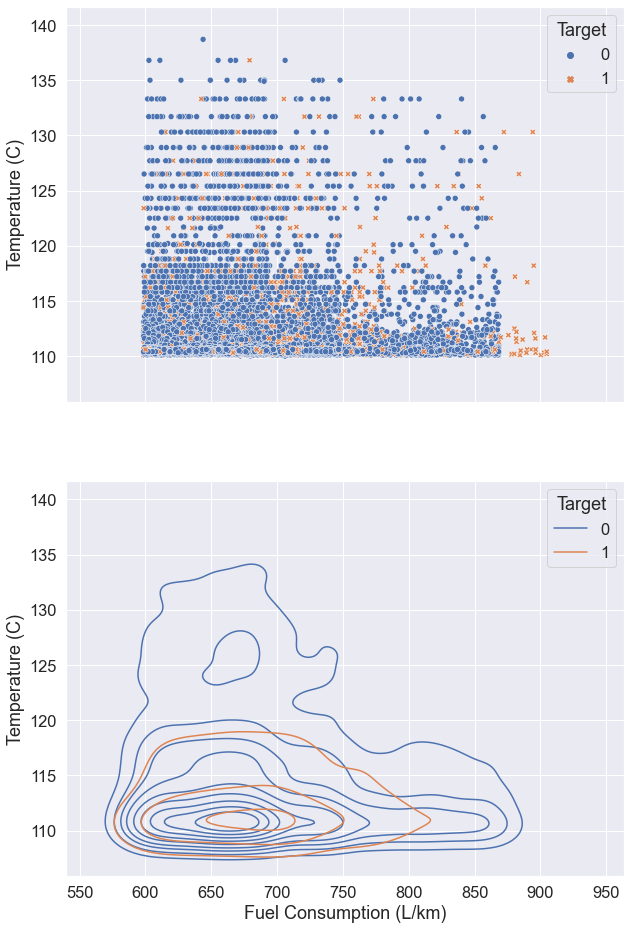

In [57]:
utils.scatter_kdeplot(cleaned_df, "Fuel consumption", "Temperature (C)", "Fuel Consumption (L/km)", "Temperature (C)")

Based on the graph above, it is clear to see that if the car's fuel consumption exceeds 875 L/km, the car will have a greater tendency of car failures detected. 

### 6.2.4 `Fuel Consumption` & `Usage`

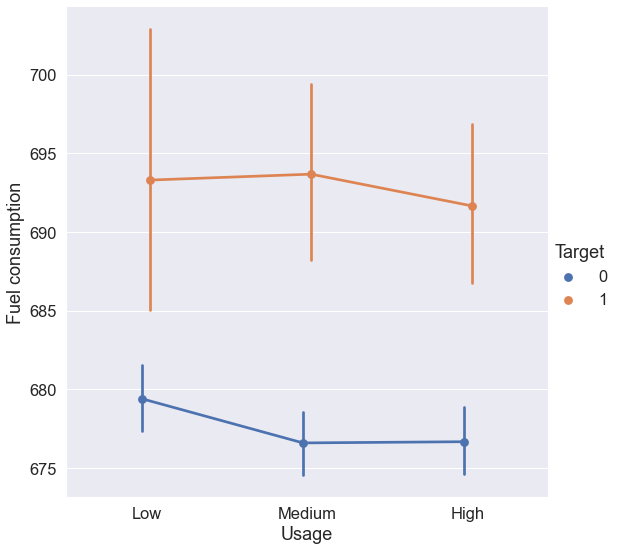

In [58]:
sns.catplot(data=cleaned_df, x="Usage", y="Fuel consumption", hue="Target", kind="point", dodge=True, height=8)
plt.show();

Based on the graph above, we can see that the mean estimate for cars with no failures detected is decreasing as the owner usage frequency of the car increases. Furthermore, the uncertainty of the estimate is a lot smaller for cars with no failures detected compared to cars with failures detected. Overall, it is clear that regardless of the owner usage frequency, as long as the car engine fuel consumption is greater than or equals to 684 L/km, the occurence of car failure will be high. 

### 6.2.5 `Fuel Consumption` & `Membership`

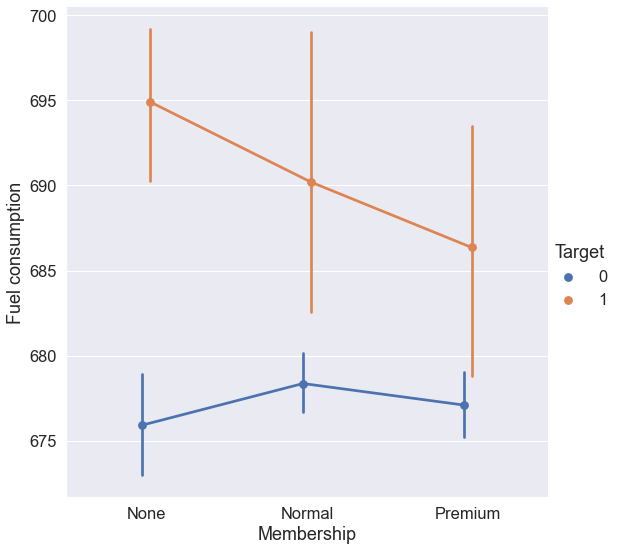

In [59]:
sns.catplot(data=cleaned_df, x="Membership", y="Fuel consumption", hue="Target", kind="point", dodge=True, height=8)
plt.show();

From the graph above, we observe a decreasing fuel consumption trend for cars with failures detected as the membership tier rises. This makes sense given that more car servicings are available as we move to higher membership tiers. Furthermore, the uncertainty of the estimate for cars with no failures detected are a lot smaller relative to that for cars with failures detected. 

### 6.2.5 `Fuel Consumption` & `Country`

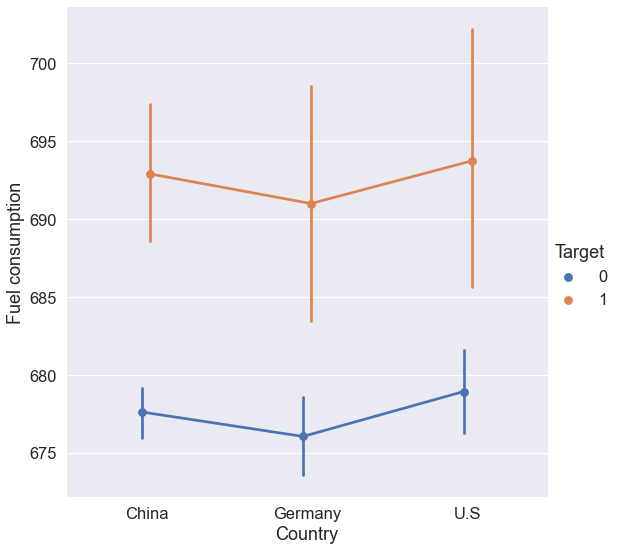

In [60]:
sns.catplot(data=cleaned_df, x="Country", y="Fuel consumption", hue="Target", kind="point", dodge=True, height=8)
plt.show();

Based on the graph above, we can see that U.S manufactured cars have the highest estimated mean car engine fuel consumption while cars manufactured in Germany has the lowest. Furthermore, looking at the uncertainty of the estimates across the three countries, China seems to have the smallest while the U.S has the largest.

### 6.2.6 `Fuel Consumption` & `Model No.`

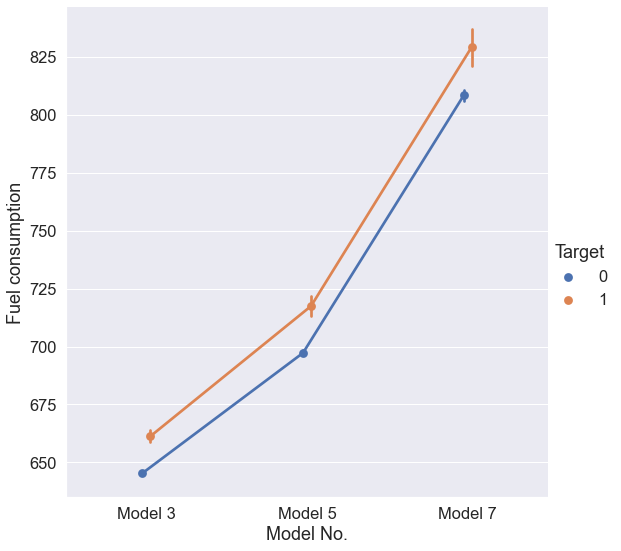

In [61]:
sns.catplot(data=cleaned_df, x="Model No.", y="Fuel consumption", hue="Target", kind="point", dodge=True, height=8)
plt.show();

Based on the graph above, we can see that the car engine fuel consumption increases as the car model specification increases. 

In [62]:
# Car Age with Temperature/Fuel Consumption/RPM (hue=Target)

## 6.3 Multivariate Analysis

**Approach:** 
1. Encoding categorical features:
    - Label Encoding: NIL
    - oneHot Encoding: `Country`, `City`, `Color`
    - Ordinal Encoding: `Usage`, `Model No.`, `Membership`
2. Use heatmaps and pearson's correlation to identify any interesting findings or correlations


For those columns that will be encoded via oneHot encoding, it is because none of these columns have any order. Whereas for columns that will be encoded via ordinal encoding, these columns do follow a particular order as shown below for each of those columns:(in ascending order)
- `Model No.`: Model 3 -> Model 5 -> Model 7
- `Usage`: Low -> Medium -> High
- `Membership`: None -> Normal -> Premium

In [63]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Car ID            9999 non-null   object  
 1   Model             9999 non-null   object  
 2   Color             9999 non-null   object  
 3   Temperature       9999 non-null   object  
 4   RPM               9999 non-null   int64   
 5   Factory           9999 non-null   object  
 6   Usage             9999 non-null   category
 7   Fuel consumption  9999 non-null   float64 
 8   Membership        9999 non-null   category
 9   Failure A         9999 non-null   int64   
 10  Failure B         9999 non-null   int64   
 11  Failure C         9999 non-null   int64   
 12  Failure D         9999 non-null   int64   
 13  Failure E         9999 non-null   int64   
 14  Model No.         9999 non-null   category
 15  Car Year          9999 non-null   int64   
 16  Car Age           9999 n

In [64]:
# Finding out which columns consists of categorical values
num_cols = np.array(cleaned_df._get_numeric_data().columns)
cat_cols = list(set(cleaned_df.columns) - set(num_cols))

remove_cols = ["Car ID", "Target", "Temperature", "Model", "Factory"]
cat_cols = list(set(cat_cols) - set(remove_cols))

print(f"Number of Categorical Columns: {len(cat_cols)}")
print(f"Categorical Columns: {cat_cols}")

Number of Categorical Columns: 6
Categorical Columns: ['City', 'Membership', 'Country', 'Model No.', 'Usage', 'Color']


In [65]:
# Encoding techniques are implemented onto the relevant categorical variables mentioned earlier
encoded_df = utils.encoder(cleaned_df, ["Country", "City", "Color"], ["Usage", "Model No.", "Membership"], 
                            ["Low", "Medium", "High"], ["Model 3", "Model 5", "Model 7"], ["None", "Normal", "Premium"])

In [66]:
# Calculate Pearson's correlation between features and target variable
encoded_df["Target"] = encoded_df["Target"].astype(int)
encoded_df["Target"] = encoded_df.pop("Target")
encoded_df.drop(columns=["Target"]).corrwith(encoded_df["Target"]).sort_values(ascending=False)

Failure C           0.470858
Failure E           0.433493
Failure A           0.429258
Failure D           0.416322
Failure B           0.360423
Usage               0.128589
Fuel consumption    0.085629
Car Age             0.051159
Temperature (C)     0.036475
City_Shang Hai      0.023831
Country_China       0.023831
Color_Grey          0.012627
Color_Red           0.002668
Color_Black         0.002520
Color_White        -0.001255
City_Berlin        -0.001533
Country_Germany    -0.001533
RPM                -0.012958
Color_Blue         -0.015593
Model No.          -0.023310
Country_U.S        -0.027327
City_New York      -0.027327
Car Year           -0.051159
Membership         -0.320530
dtype: float64

Based on the results above and knowing that there are many categorical data, it shows that there isn't any very strong evidence of linear correlation between any of the features and target variable. On the other hand, apart from all of the different failure types, there are a few features (such as `Usage`, `Fuel Consumption`, `Membership` and `Car Age`) that may play a role in influencing the occurence of a car failure. However, we have to remind ourselves that correlation does not mean causation and for completeness, a heatmap correlation plot is generated below. 

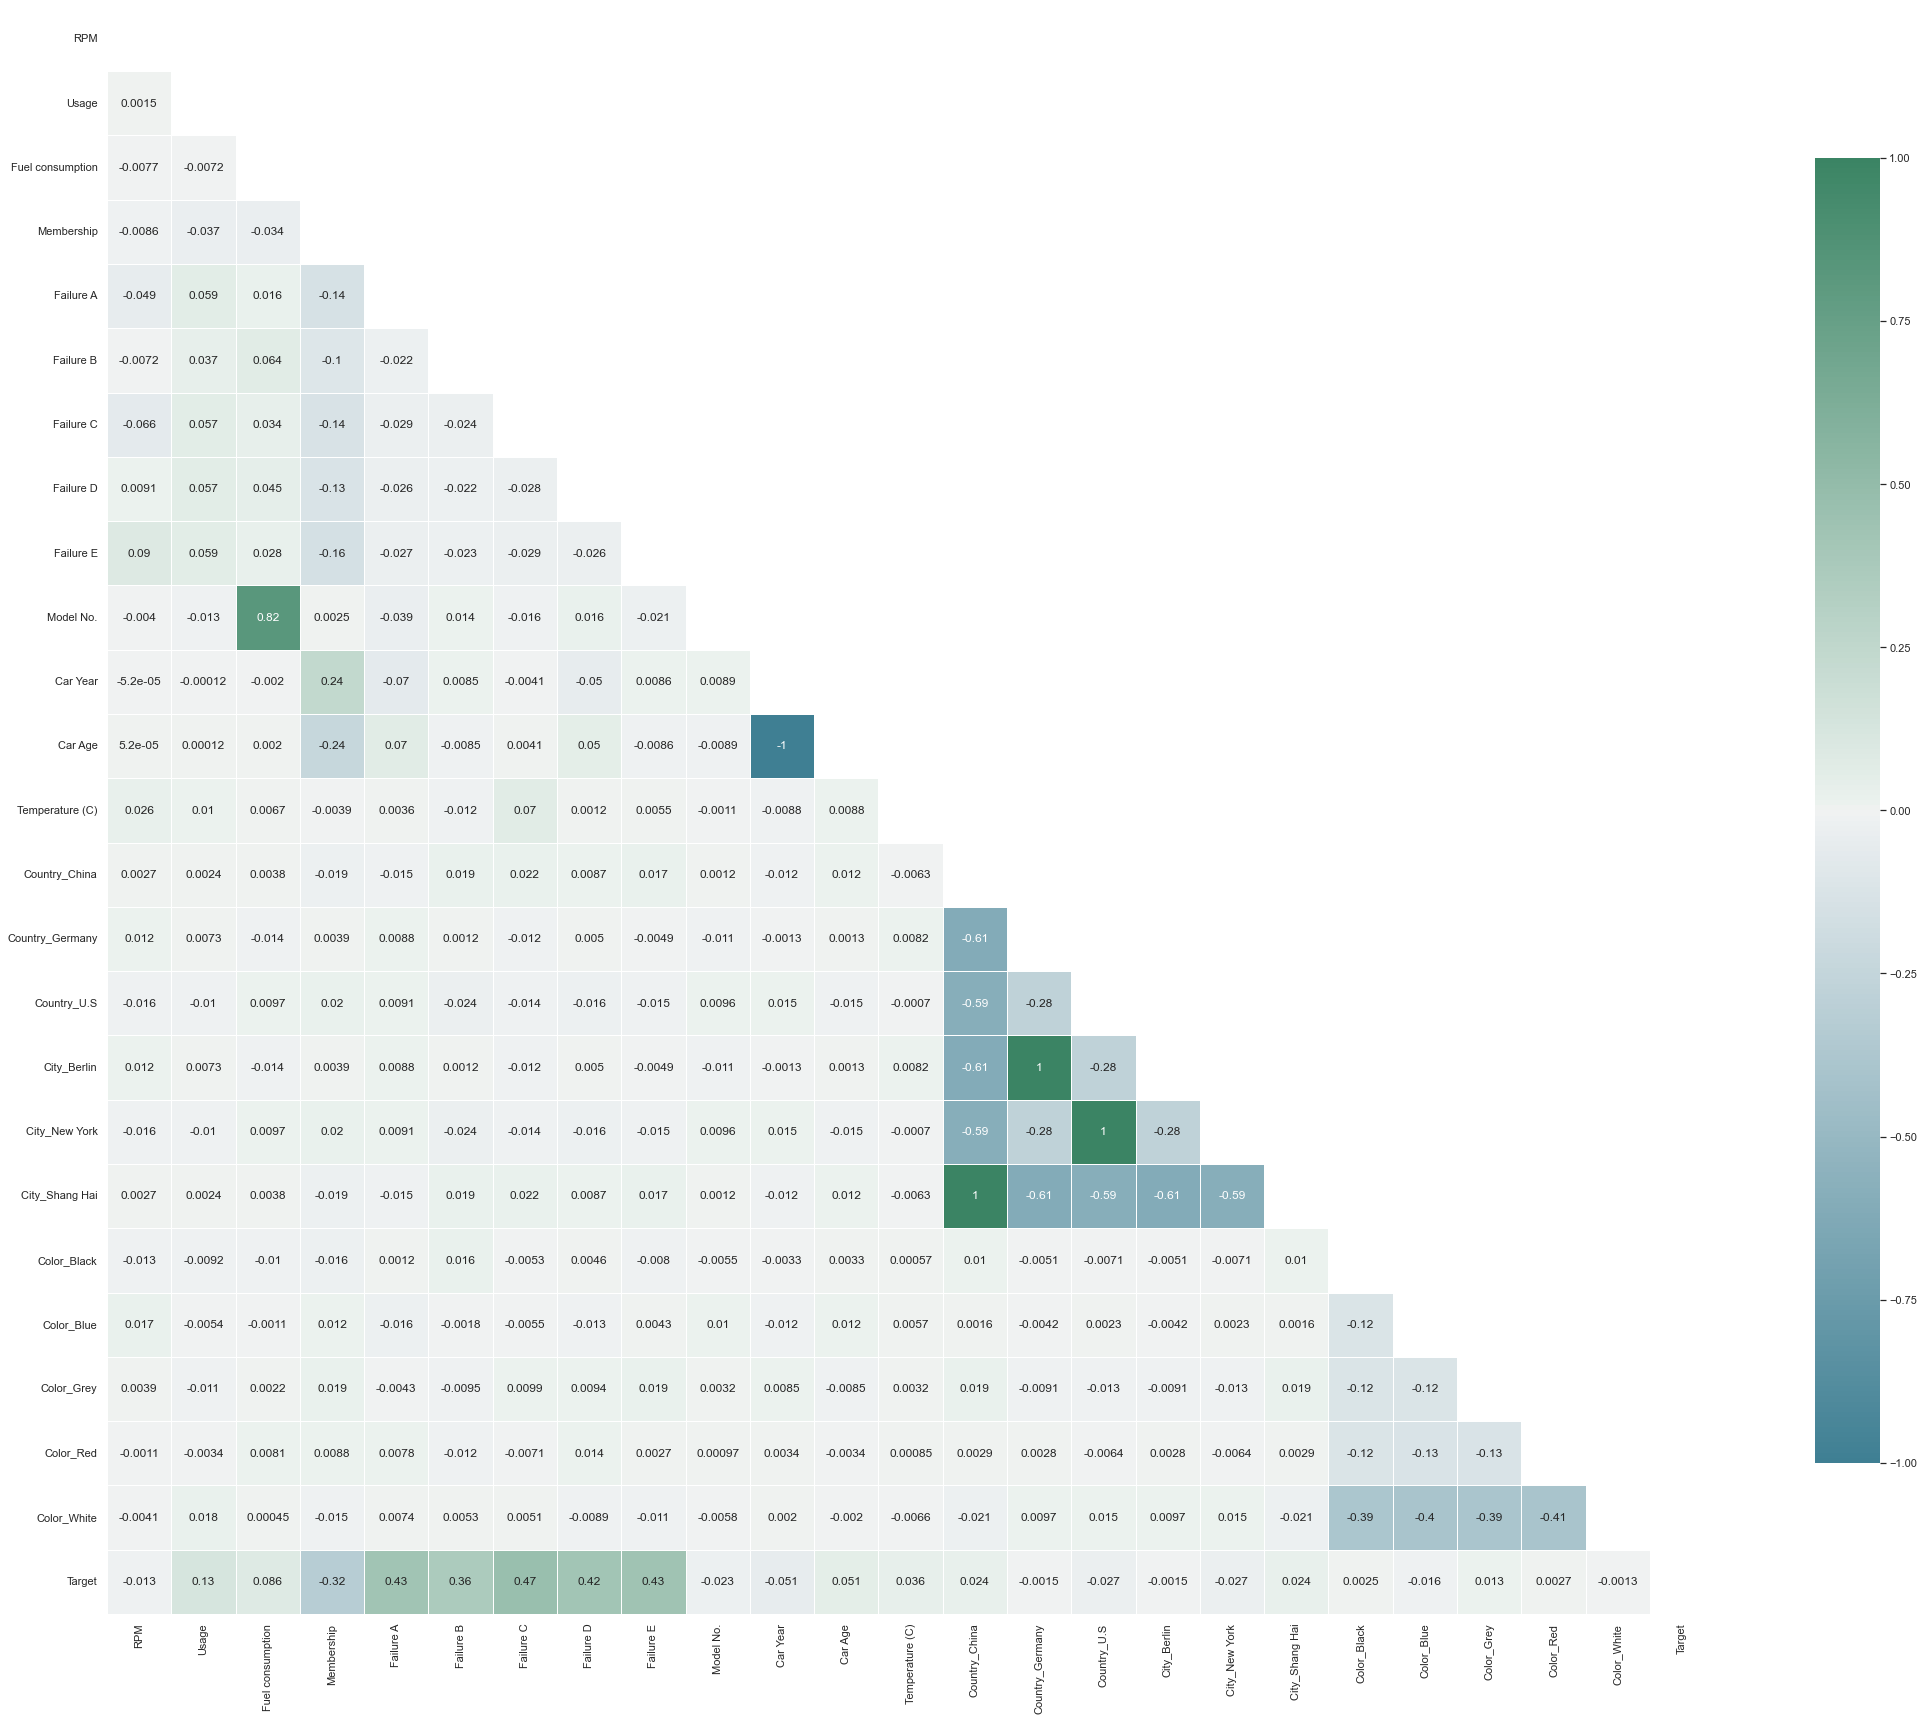

In [67]:
# Plotting Heatmap Correlation Plot
sns.set(style="white", rc={'figure.figsize':(36, 30)})

# Generate a mask for the upper triangle
mask = np.zeros_like(encoded_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# annot = annotation ; fmt = decimal points shown
sns.heatmap(encoded_df.corr(), mask=mask, cmap=cmap, fmt='0.2g',
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True)
plt.show();

Based on the graph above, we can see some similar findings (compared to earlier investigations) such as:
- Positive correlation between the `Model No.` and `Fuel consumption` columns (i.e. 82%)
- Positive correlation between the `Car Year` and `Membership` columns (i.e. 24%)
- Positive correlation between the `Target` and `Usage` columns (i.e. 13%)
- Negative correlation between the `Car Age` and `Membership` columns (i.e. 24%)
- Negative correlation between the `Target` and `Membership` columns (i.e. 32%)

Apart from these, other correlations among these columns such as `Country_`, `City_` and `Color_` are not useful given that it is expected of them to be correlated. Overall, the some of the positive and negative correlations highlighted above may also have been looked into during our earlier investigations and showed similar results.

# 7. Feature Engineering

<u>**Approach:**</u>

1. Feature Construction: adding new features from the existing data
    - Polynomial Features
    - Domain Knowledge Features
<br></br>

2. Feature Selection: choosing only the most important features or other methods of dimensionality reduction
    - Select the features based on the feature importance scorings
    - Backward Feature Elimination
    - Recursive Feature Elimination

<br></br>
([Reference](https://towardsdatascience.com/intro-to-feature-selection-methods-for-data-science-4cae2178a00a))
    

In [68]:
# Remove all unwanted columns for `final_df` to be used for model training
all_cols = encoded_df.columns
print(f"List of columns ({len(all_cols)}): {list(all_cols)} \n")

remove_cols = ["Car ID", "Target", "Temperature", "Model", "Factory", "Failure A", "Failure B", "Failure C", "Failure D", "Failure E", "Car Year"]
remove_cols.remove("Target") # Remove the "Target" item in this remove_cols list
print(f"List of columns to be removed ({len(remove_cols)}): {list(remove_cols)} \n")

cols = list(set(all_cols) - set(remove_cols))
print(f"List of columns remaining ({len(cols)}): {list(cols)} \n")

final_df = encoded_df[cols].copy().reset_index(drop=True)
final_df.head()

List of columns (29): ['Car ID', 'Model', 'Temperature', 'RPM', 'Factory', 'Usage', 'Fuel consumption', 'Membership', 'Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E', 'Model No.', 'Car Year', 'Car Age', 'Temperature (C)', 'Country_China', 'Country_Germany', 'Country_U.S', 'City_Berlin', 'City_New York', 'City_Shang Hai', 'Color_Black', 'Color_Blue', 'Color_Grey', 'Color_Red', 'Color_White', 'Target'] 

List of columns to be removed (10): ['Car ID', 'Temperature', 'Model', 'Factory', 'Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E', 'Car Year'] 

List of columns remaining (19): ['City_New York', 'Temperature (C)', 'Country_China', 'RPM', 'Car Age', 'City_Shang Hai', 'Country_Germany', 'Color_White', 'Target', 'Membership', 'Fuel consumption', 'Color_Grey', 'Model No.', 'Country_U.S', 'City_Berlin', 'Color_Red', 'Color_Blue', 'Usage', 'Color_Black'] 



,City_New York,Temperature (C),Country_China,RPM,Car Age,City_Shang Hai,Country_Germany,Color_White,Target,Membership,Fuel consumption,Color_Grey,Model No.,Country_U.S,City_Berlin,Color_Red,Color_Blue,Usage,Color_Black
0,0,110.3,1,1551,1,1,0,0,0,1.0,659.7,0,1.0,0,0,0,1,1.0,0
1,0,110.4,1,1408,1,1,0,0,1,2.0,705.3,0,0.0,0,0,0,0,1.0,1
2,0,110.3,1,1498,1,1,0,0,0,2.0,670.7,1,0.0,0,0,0,0,0.0,0
3,0,110.4,0,1433,1,0,1,0,1,2.0,630.6,0,0.0,0,1,0,0,2.0,1
4,0,110.3,1,1425,2,1,0,1,0,2.0,691.8,0,1.0,0,0,0,0,1.0,0


In [69]:
# Saving Dataframe as a CSV file
final_df.to_csv("./data/final_data.csv", index=False)

## 7.1 Feature Construction


From the earlier sections, several original columns were split/converted into new columns such as `Car Age`, `Model No.`, `Temperature (C)`, `Country`, `City` and `Target`. On top of that, encoding methods such as oneHot encoding and ordinal encoding were used on the categorical variables in order to investigate on the correlations between different variables along with model training. 

## 7.2 Feature Selection
### 7.2.1 Feature Importance Score

Columns: ['City_New York', 'Temperature (C)', 'Country_China', 'RPM', 'Car Age', 'City_Shang Hai', 'Country_Germany', 'Color_White', 'Target', 'Membership', 'Fuel consumption', 'Color_Grey', 'Model No.', 'Country_U.S', 'City_Berlin', 'Color_Red', 'Color_Blue', 'Usage', 'Color_Black']


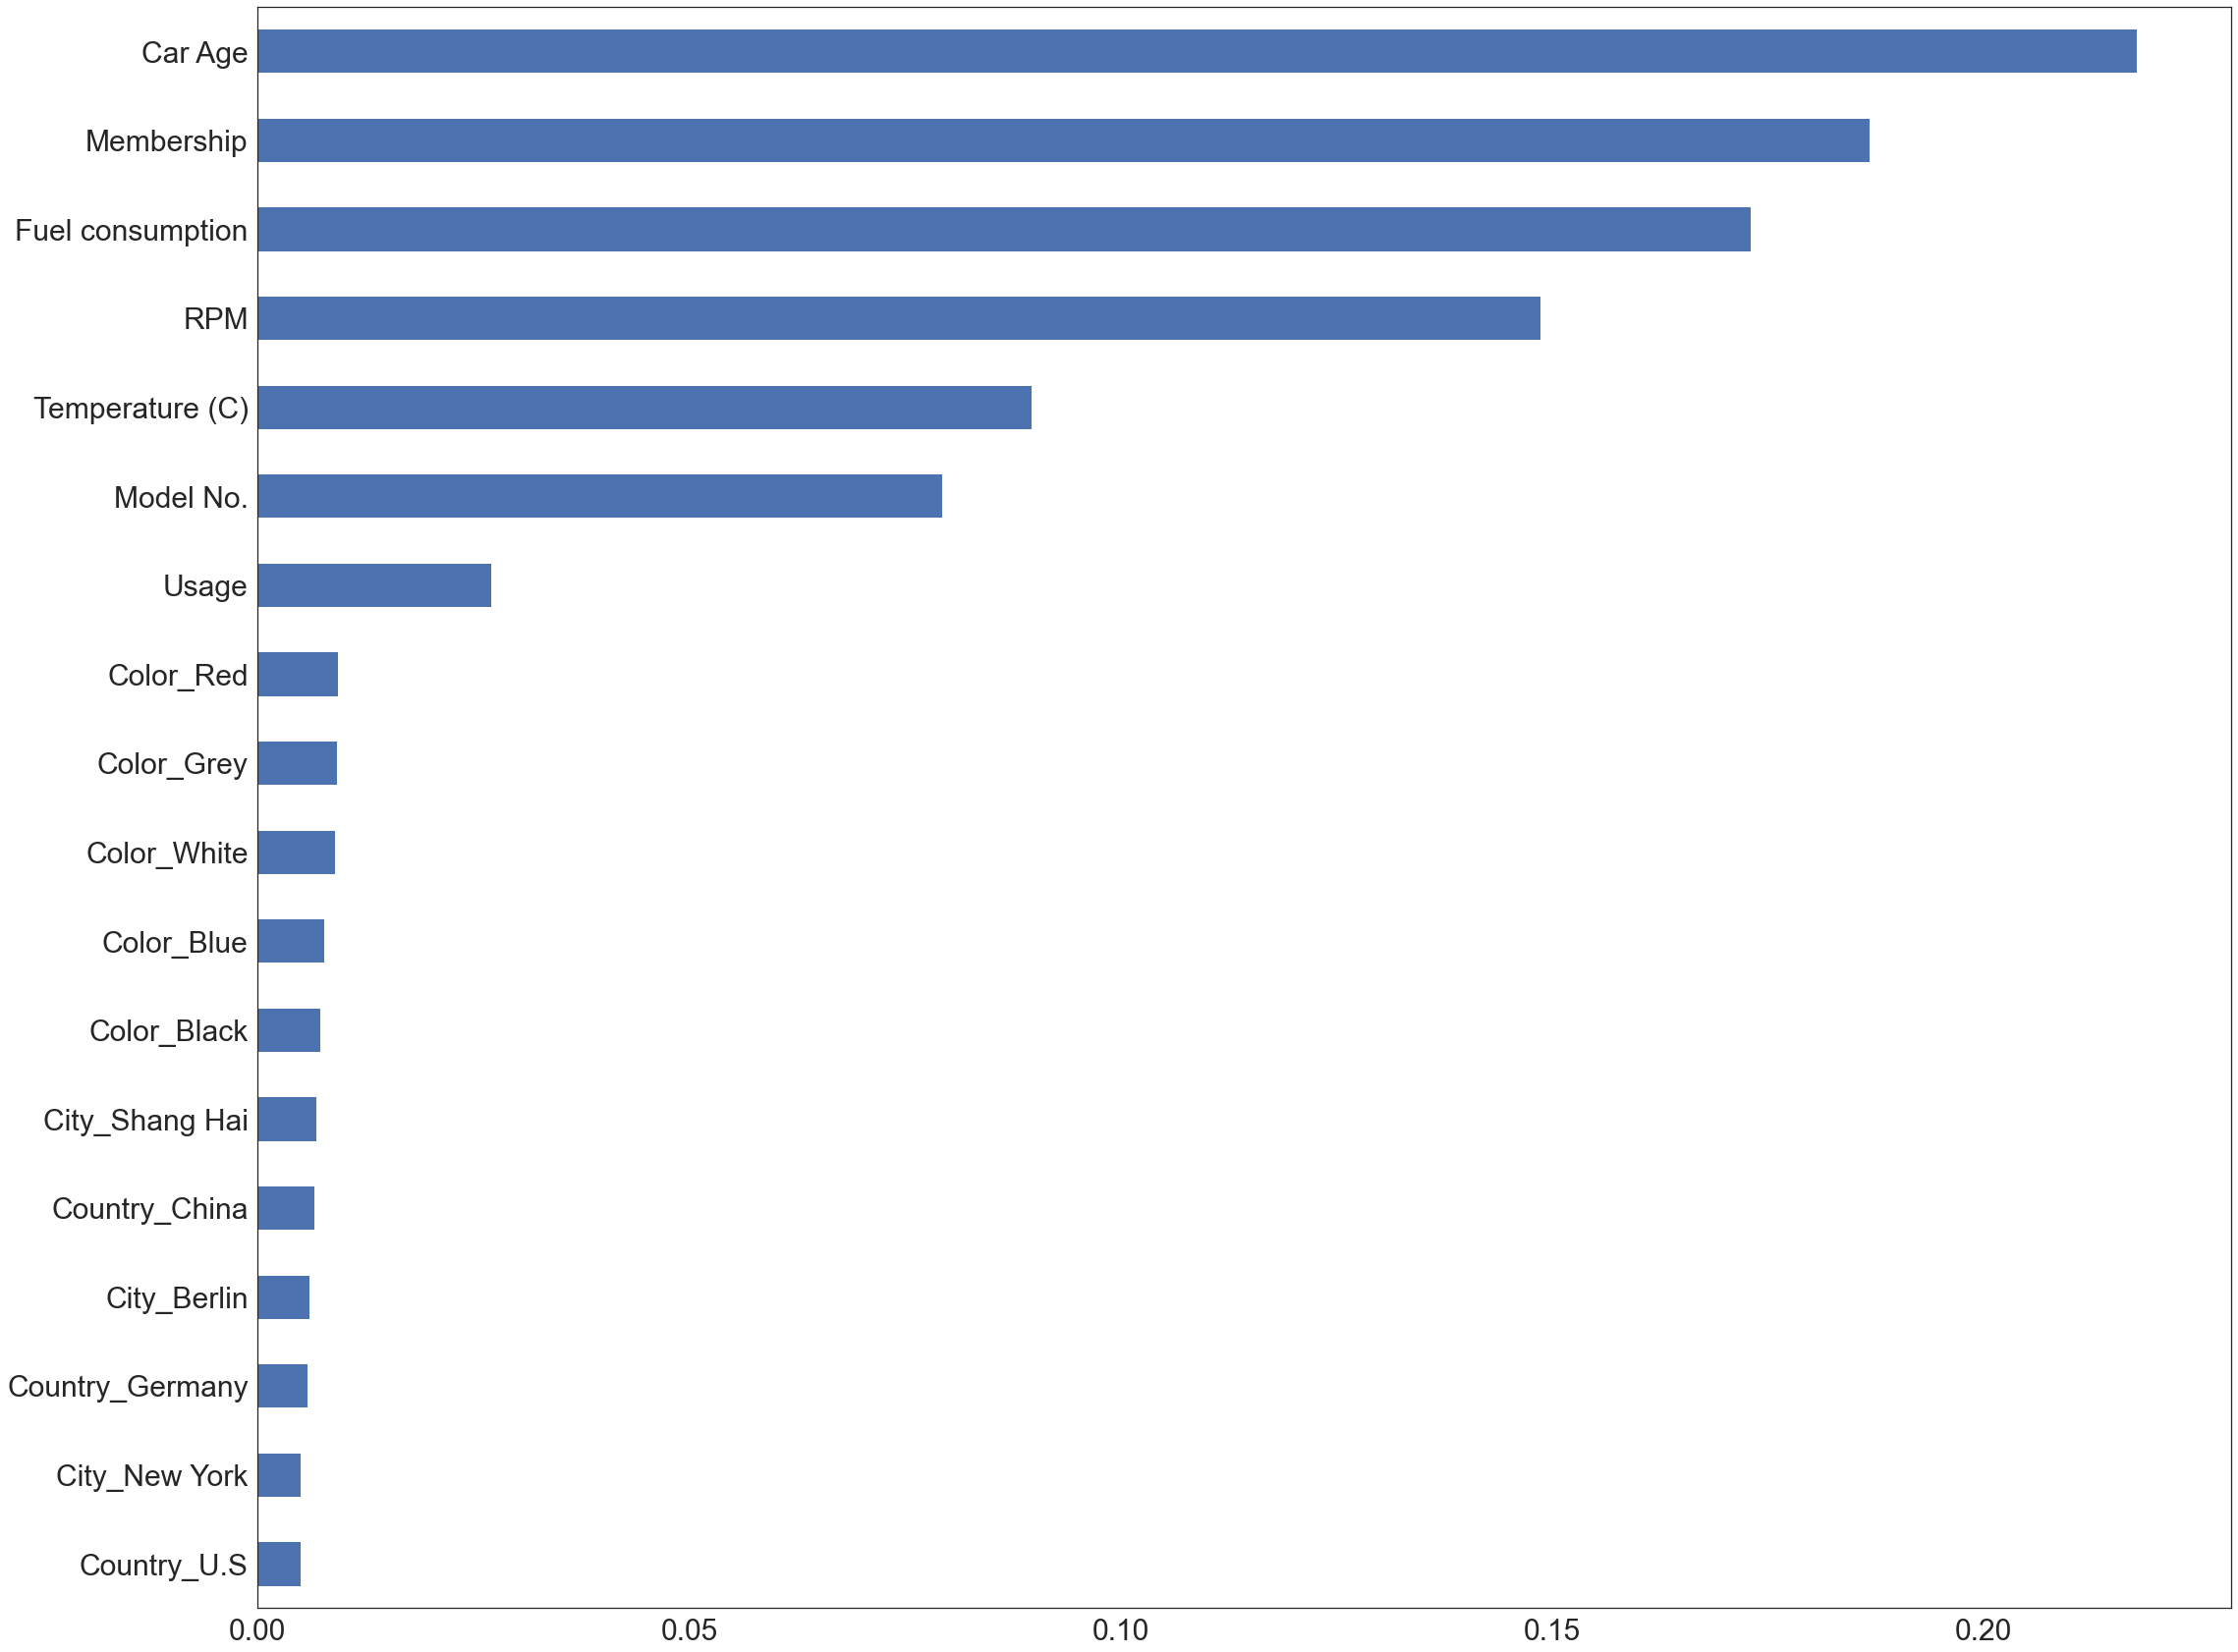

Car Age             0.217849
Membership          0.186861
Fuel consumption    0.172995
RPM                 0.148676
Temperature (C)     0.089674
Model No.           0.079329
Usage               0.027043
Color_Red           0.009254
Color_Grey          0.009199
Color_White         0.009012
Color_Blue          0.007715
Color_Black         0.007305
City_Shang Hai      0.006801
Country_China       0.006568
City_Berlin         0.005980
Country_Germany     0.005755
City_New York       0.005009
Country_U.S         0.004976
dtype: float64

In [70]:
print(f"Columns: {cols}")

# Using RF regressor (n_estimators=200 by default) to obtain the feature importance scores and plot a horizontal bar chart for illustration
features = [i for i in cols if i not in ["Target"]]
utils.feature_import_plot(final_df, features, "Target")

Based on the results above, we can identify the important features (in descending order) which are: `Membership`, `Fuel consumption`, `RPM`, `Car Age`, `Car Year`, `Temperature (C)`, `Model No.` and `Usage`. The remaining columns which are related to either `Color` or `Country` were not shown to have a reasonable relation to the `Target` which is identifying the occurence of a car failure. However, we should still be aware than majority of the cars are manufactured from China (i.e. 56.3%) and most of the cars are in white color (i.e. 55.7%). 


### 7.2.2 Backward Feature Elimination

It is a method that removes features which are not predictive of the target variable or not statistically significant (i.e. high p-values). Unlike Forward Selection, it starts with all features included in the model and then removes the least relevant features one at a time until all variables in the model have a p-value below a given threshold. 

Whereas for Forward selection, it starts with no features included in the model and then adds the most relevant features one at a time. This method is a greedy approach and can be computationally expensive along with not being able to find the most optimal set of features. ([Reference](https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article))
<br></br>

**Assumptions of the Backward Feature Elimination are:**
1. No missing values in the dataset
2. High variance in the feature variables
3. Low correlation between independent variables

([Reference](https://github.com/rasbt/mlxtend/issues/274))

In [78]:
# Using Linear Regression to implement the Backward Feature Elimination Method
utils.backward_feature_elim(final_df, features, "Target", k_features=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished
Features: 17/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished
Features: 16/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished
Features: 15/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
Features: 14/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
Features: 13/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
Features: 12/10[Par

K-feature names: ['City_New York', 'Temperature (C)', 'Country_China', 'Car Age', 'City_Shang Hai', 'Country_Germany', 'Membership', 'Fuel consumption', 'Model No.', 'Usage']


Based on the results shown above, it is a bit out of the blue to see `Color_`, `Country_` and `City_` as one of the top 10 most relevant features given that the pearson's correlation values and feature importance scores did not come to the same conclusion. It could be due to the low variances in the feature variables which resulted to getting this output, hence, this method might not be suitable for this case. 

### 7.2.3 Recursive Feature Elimination

It is a method that removes features one at a time based on the weights given by a model of our choice in each iteration. In this case, RandomForest model was used. 

([Reference](https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e))

In [79]:
rfe_data = utils.recursive_feature_elim(final_df, features, "Target", k_features=10)
rfe_data.head()

,Temperature (C),RPM,Car Age,City_Shang Hai,Country_Germany,Color_White,Membership,Fuel consumption,Model No.,Usage
0,110.3,1551,1,1,0,0,1.0,659.7,1.0,1.0
1,110.4,1408,1,1,0,0,2.0,705.3,0.0,1.0
2,110.3,1498,1,1,0,0,2.0,670.7,0.0,0.0
3,110.4,1433,1,0,1,0,2.0,630.6,0.0,2.0
4,110.3,1425,2,1,0,1,2.0,691.8,1.0,1.0


In [80]:
rfe_data.columns

Index(['Temperature (C)', 'RPM', 'Car Age', 'City_Shang Hai',
       'Country_Germany', 'Color_White', 'Membership', 'Fuel consumption',
       'Model No.', 'Usage'],
      dtype='object')

Based on the results above, we can see that most of the significant features highlighted earlier are shown here. This helps us to be more confident with the features that we will need to use for model training. Also, fortunately the given dataset (i.e. 10K+ rows) is not considered large as the computation time will be heavy when the RFE trains the model on very large datasets with many features. 

In [74]:
# # Imputer for handling missing values
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler

# # Modeling Metrics 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, precision_recall_curve, average_precision_score, recall_score, roc_auc_score, roc_curve, auc

# # Importing several Classification Models
# from xgboost import XGBClassifier


# # Over-Sampling Method
# class_1, class_0 = utils.split_category(final_df)
# class_count_1 = len(class_1)
# class_count_0 = len(class_0)

# print(f"1: {class_count_1} | 0: {class_count_0}")

# class_1_over = class_1.sample(class_count_0, replace=True)
# over_sampling_data = pd.concat([class_1_over, class_0], axis=0)

# print(f"New DataFrame Shape: {over_sampling_data.shape} \n")
# print("Total class of 1 and 0:")
# print(over_sampling_data['Target'].value_counts())


# # Data Preprocessing 
# def preprocess_data(data):
#     # Feature names
#     features = list(data.columns)

#     # Median imputation of missing values if there are any
#     imputer = SimpleImputer(strategy = 'median')

#     # Scale each feature to 0 - 1
#     scaler = MinMaxScaler(feature_range = (0, 1))

#     # Fit on the training data
#     imputer.fit(data)

#     # Transform dataset
#     transformed_data = imputer.transform(data)

#     # Repeat with the scaler
#     scaler.fit(transformed_data)
#     train = scaler.transform(transformed_data)

#     transformed_data = pd.DataFrame(data=transformed_data, columns=features)
#     print(f"Transformed Data Shape: {transformed_data.shape}")

#     return transformed_data

# transformed_data = preprocess_data(over_sampling_data)
# transformed_data.head()


# y = transformed_data["Target"]
# x = transformed_data[list(rfe_data.columns)]

# # Stratify the sample by the target variable will ensure your training set looks 
# # similar to your test set, making your evaluation metrics more reliable.
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

# xgb_model = XGBClassifier(use_label_encoder=False).fit(X_train, y_train, eval_metric='auc')

# # predict
# xgb_y_pred_test = xgb_model.predict(X_test)

# # recall score
# xgb_score = recall_score(y_test, xgb_y_pred_test)
# print('Recall score:', xgb_score)

# 8. Summary of EDA Findings

From our EDA findings mentioned above, I have split the significance of the features into two categories (i.e. more significant and less significant features) so that we are aware of what are the key features that should be utilised for model training. 


1. **More significant features are:**
    - `Membership`
    - `Fuel Consumption`
    - `Usage`
    - `Model No.`
    - `Car Age`
    - `RPM`
    - `Temperature (C)`

<br>

2. **Less significant features are:**
    - `Color`
    - `Country` 



All in all, the features that displayed significance are expected given that the above findings from univariate, bivariate, multivariate analyses and the feature importance scorce using Random Forest have shown repeatedly that these are the main few features that have more significance. Apart from this, let's also highlight what are the additional steps that could be looked into that was not done in this EDA task. 

# 9. Future Works & Considerations

1. Data Cleaning
    - Instead of dropping those duplicated IDs, it could be possible to investigate whether these records are basically coming from repeated customers but it just a different car. 
    - Conduct outlier detection or change detection via some statistical models such as One-Class SVM, Robust Covariance, Isolation Forest and Local Outlier Factor, etc. 

<br>

2. Feature Engineering
    - Apply PCA ot t-SNE methods to reduce the dimensionality of the dataset. However, we have to take note that we are only given about 14 original features along with 10K+ samples to utilise, applying these methods might lose more valuable information. Using VIF to check for multicollinearity and then dropping features that have less important scores and high multicollinearity with other features can be another approach to look into. 
    - Based on the different list of features generated via different feature selection methods, for future works, I thought it would be good to list out the different sets of most relevant features in a DataFrame before testing out to see among the list of models and set of features which combination performs the best test results after model training. 

<br>

3. Handling Imbalanced Dataset
    - In the mlp.py file, it can be seen that SMOTE method was used to generate synthetic data for the minority class by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. However, there are some disadvantages such as oversampling noisy samples and it is difficult to determine the number of nearest neighbors and there is a strong blindess on the selection of nearest neighbours for the synthetic samples. Therefore, another approach that can be looked into is to use penalised learning algorithms (such as Penalised-SVM model) that increase the cost of classification mistakes on the minority class. 